# Projeto Fase 5 - Machine Learning na Cabeça
## FarmTech Solutions - Análise de Rendimento de Safra

Este notebook contém a análise de dados e modelagem para prever o rendimento de safras agrícolas com base em condições climáticas e de solo.

## Fase 1: Preparação do Ambiente e Dados

Nesta fase inicial, vamos configurar o ambiente de desenvolvimento e realizar a carga inicial dos dados para análise.

### 1. Importação das Bibliotecas Necessárias

Vamos importar as bibliotecas que serão utilizadas ao longo do projeto.

In [1]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para clusterização e modelagem
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Para regressão (modelos preditivos)
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

### 2. Carregamento do Dataset

Vamos carregar o dataset "crop_yield.csv" que contém informações sobre condições climáticas e rendimento de diferentes culturas agrícolas.

In [2]:
# Carregando o dataset crop_yield.csv
try:
    df = pd.read_csv('../crop_yield.csv')
    print("Dataset carregado com sucesso!")
except FileNotFoundError:
    print("Erro: O arquivo 'crop_yield.csv' não foi encontrado.")
    print("Por favor, verifique se o arquivo está no diretório correto.")

# Exibindo os primeiros registros
df.head()

Dataset carregado com sucesso!


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 3. Verificação Inicial dos Dados

Vamos verificar as dimensões do dataset e algumas estatísticas básicas para entender melhor os dados.

In [3]:
# Verificando as dimensões do dataset
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")

# Verificando os tipos de dados
print("\nTipos de dados:")
print(df.dtypes)

# Verificando se há valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

O dataset possui 156 linhas e 6 colunas.

Tipos de dados:
Crop                                     object
Precipitation (mm day-1)                float64
Specific Humidity at 2 Meters (g/kg)    float64
Relative Humidity at 2 Meters (%)       float64
Temperature at 2 Meters (C)             float64
Yield                                     int64
dtype: object

Valores ausentes por coluna:
Crop                                    0
Precipitation (mm day-1)                0
Specific Humidity at 2 Meters (g/kg)    0
Relative Humidity at 2 Meters (%)       0
Temperature at 2 Meters (C)             0
Yield                                   0
dtype: int64


In [4]:
# Estatísticas descritivas básicas
df.describe()

,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


### 4. Verificação das Culturas Presentes no Dataset

Vamos verificar quais culturas estão presentes no dataset e quantos registros existem para cada uma.

Culturas presentes no dataset:
Crop
Cocoa, beans       39
Oil palm fruit     39
Rice, paddy        39
Rubber, natural    39
Name: count, dtype: int64


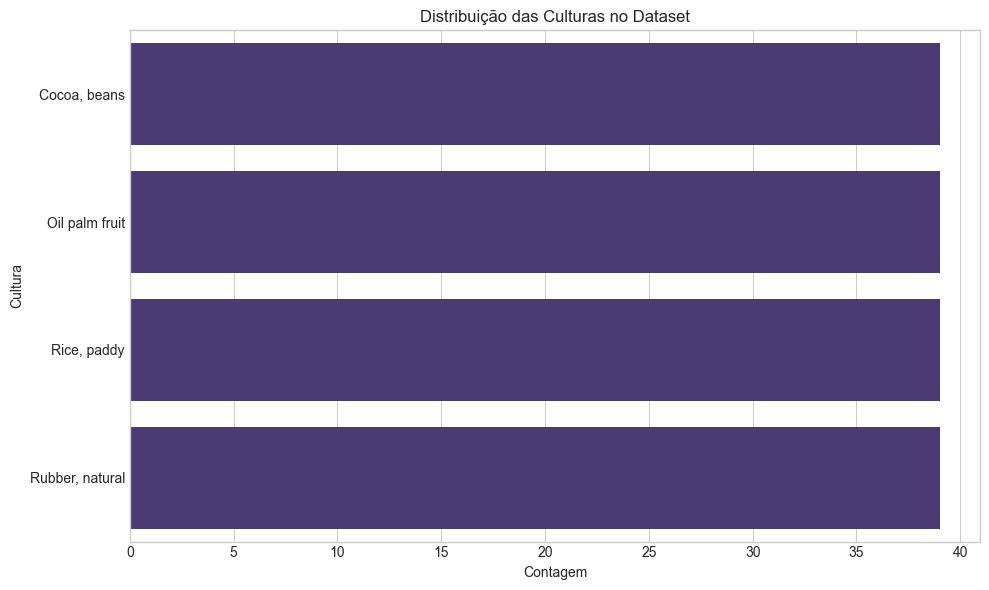

In [5]:
# Verificando as culturas presentes no dataset
print("Culturas presentes no dataset:")
crop_counts = df['Crop'].value_counts()
print(crop_counts)

# Visualizando a distribuição das culturas
plt.figure(figsize=(10, 6))
sns.countplot(y='Crop', data=df, order=df['Crop'].value_counts().index)
plt.title('Distribuição das Culturas no Dataset')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.tight_layout()
plt.show()

## Conclusão da Fase 1

Nesta fase inicial, realizamos as seguintes tarefas:

1. Configuramos o ambiente de desenvolvimento com as bibliotecas necessárias
2. Carregamos o dataset "crop_yield.csv"
3. Verificamos as dimensões e tipos de dados do dataset
4. Identificamos as culturas presentes no dataset e sua distribuição

Na próxima fase (Fase 2), realizaremos uma análise exploratória mais detalhada dos dados para entender melhor as relações entre as variáveis e identificar padrões importantes.

## Continuação do arquivo: notebooks/fase2_analise_exploratoria.ipynb

## Fase 2: Análise Exploratória de Dados

Nesta fase, realizaremos uma análise exploratória detalhada dos dados para entender melhor as relações entre as variáveis e identificar padrões importantes.

### 1. Importação das Bibliotecas e Carregamento dos Dados

Vamos importar as bibliotecas necessárias e carregar o dataset que utilizamos na Fase 1.

In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [7]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 2. Análise da Distribuição das Variáveis

Vamos analisar a distribuição de cada variável para entender melhor os dados.

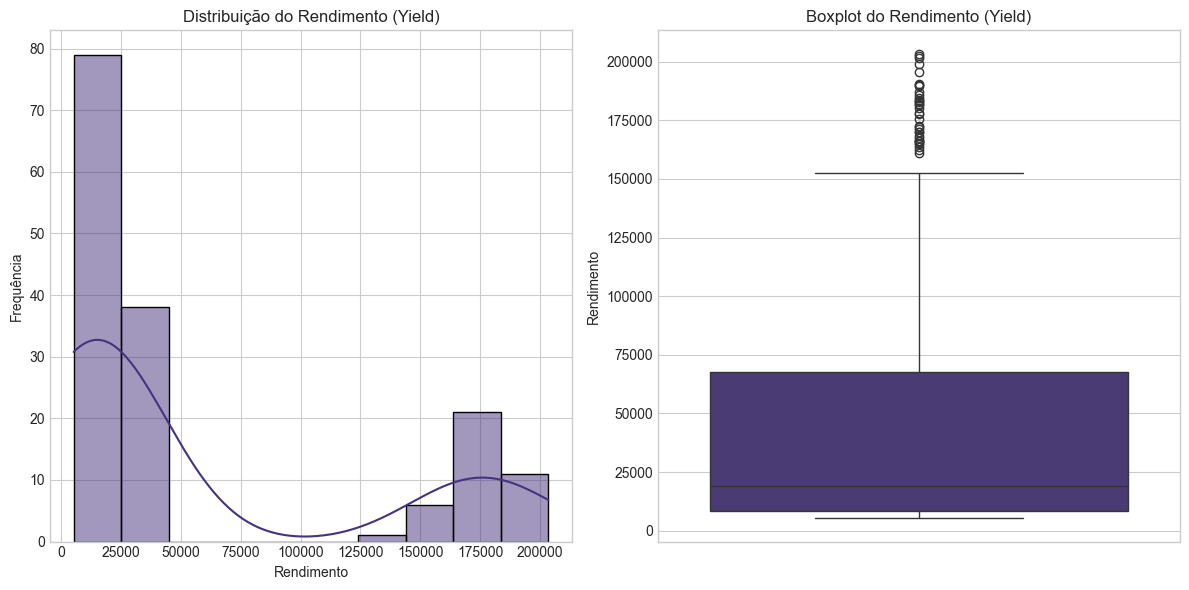

In [8]:
# Análise da distribuição da variável alvo (Yield)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Yield'], kde=True)
plt.title('Distribuição do Rendimento (Yield)')
plt.xlabel('Rendimento')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Yield'])
plt.title('Boxplot do Rendimento (Yield)')
plt.ylabel('Rendimento')

plt.tight_layout()
plt.show()

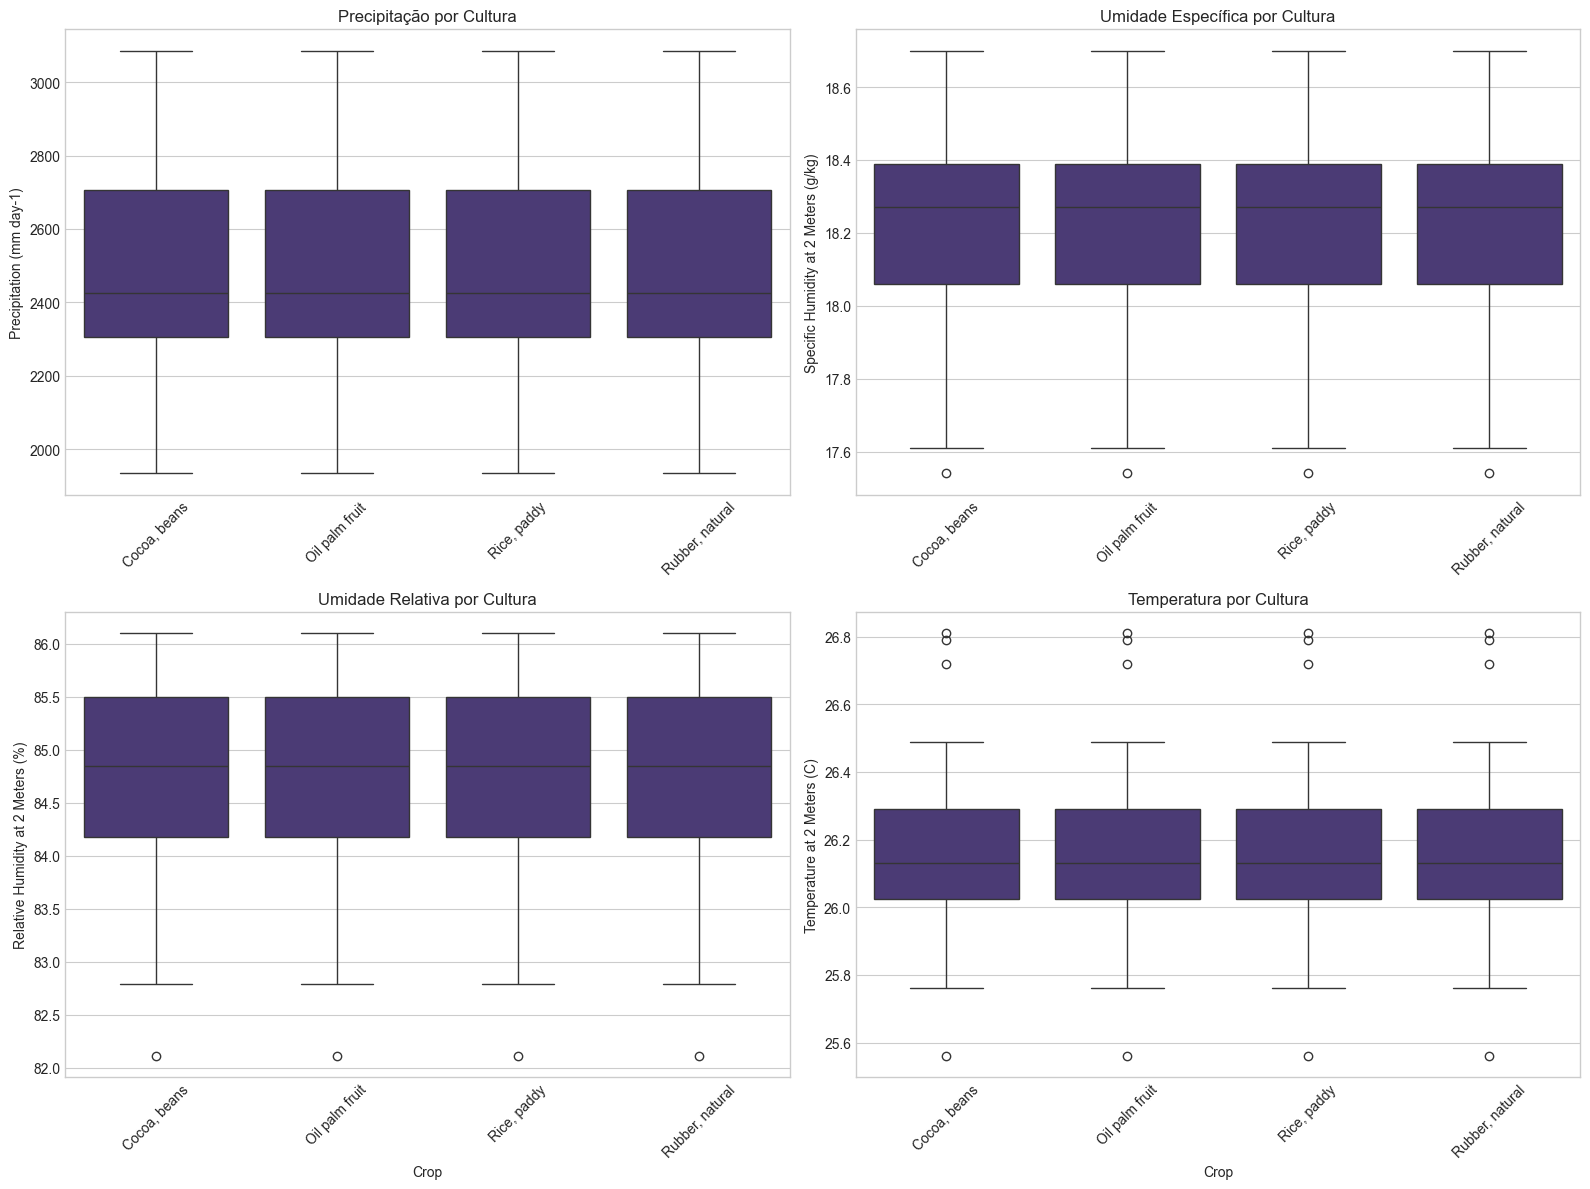

In [9]:
# Análise da distribuição das variáveis numéricas por cultura
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.boxplot(x='Crop', y='Precipitation (mm day-1)', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Precipitação por Cultura')
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Specific Humidity at 2 Meters (g/kg)', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Umidade Específica por Cultura')
axes[0, 1].set_xlabel('')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Relative Humidity at 2 Meters (%)', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Umidade Relativa por Cultura')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Crop', y='Temperature at 2 Meters (C)', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Temperatura por Cultura')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

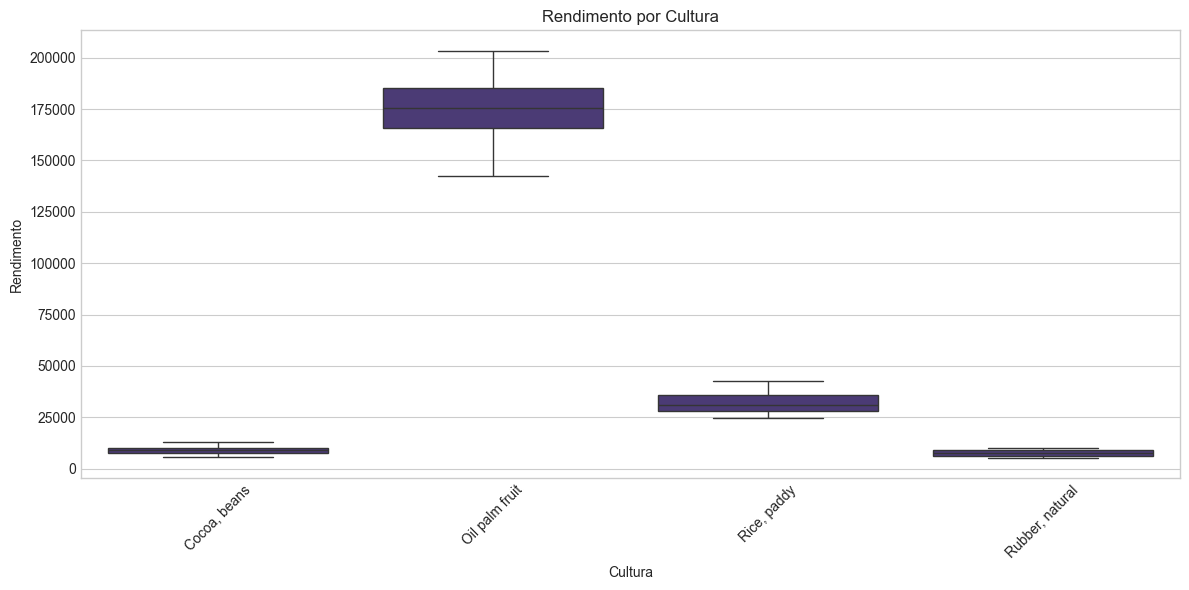

In [10]:
# Análise da distribuição do rendimento por cultura
plt.figure(figsize=(12, 6))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.title('Rendimento por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Rendimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 3. Análise de Correlação

Vamos analisar as correlações entre as variáveis para identificar relações importantes.

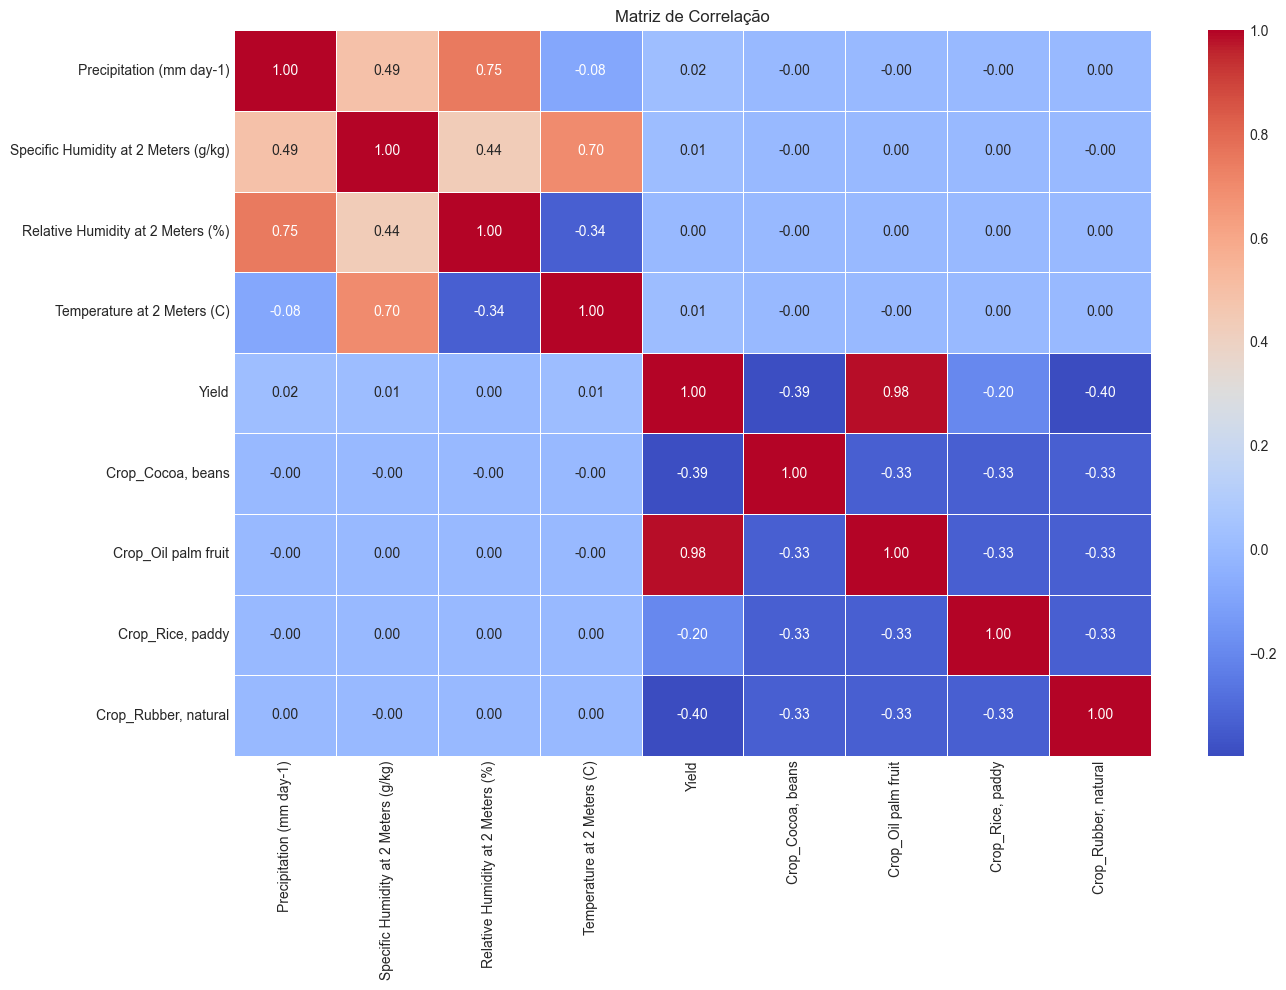

In [11]:
# Convertendo a coluna 'Crop' para numérica usando one-hot encoding para análise de correlação
df_encoded = pd.get_dummies(df, columns=['Crop'], drop_first=False)

# Calculando a matriz de correlação
correlation_matrix = df_encoded.corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.tight_layout()
plt.show()

In [12]:
# Analisando as correlações com a variável alvo (Yield)
yield_correlations = correlation_matrix['Yield'].sort_values(ascending=False)
print("Correlações com o Rendimento (Yield):")
print(yield_correlations)

Correlações com o Rendimento (Yield):
Yield                                   1.000000
Crop_Oil palm fruit                     0.984116
Precipitation (mm day-1)                0.018830
Temperature at 2 Meters (C)             0.013007
Specific Humidity at 2 Meters (g/kg)    0.012651
Relative Humidity at 2 Meters (%)       0.000008
Crop_Rice, paddy                       -0.197836
Crop_Cocoa, beans                      -0.388788
Crop_Rubber, natural                   -0.397492
Name: Yield, dtype: float64


### 4. Análise de Dispersão

Vamos criar gráficos de dispersão para visualizar as relações entre as variáveis climáticas e o rendimento.

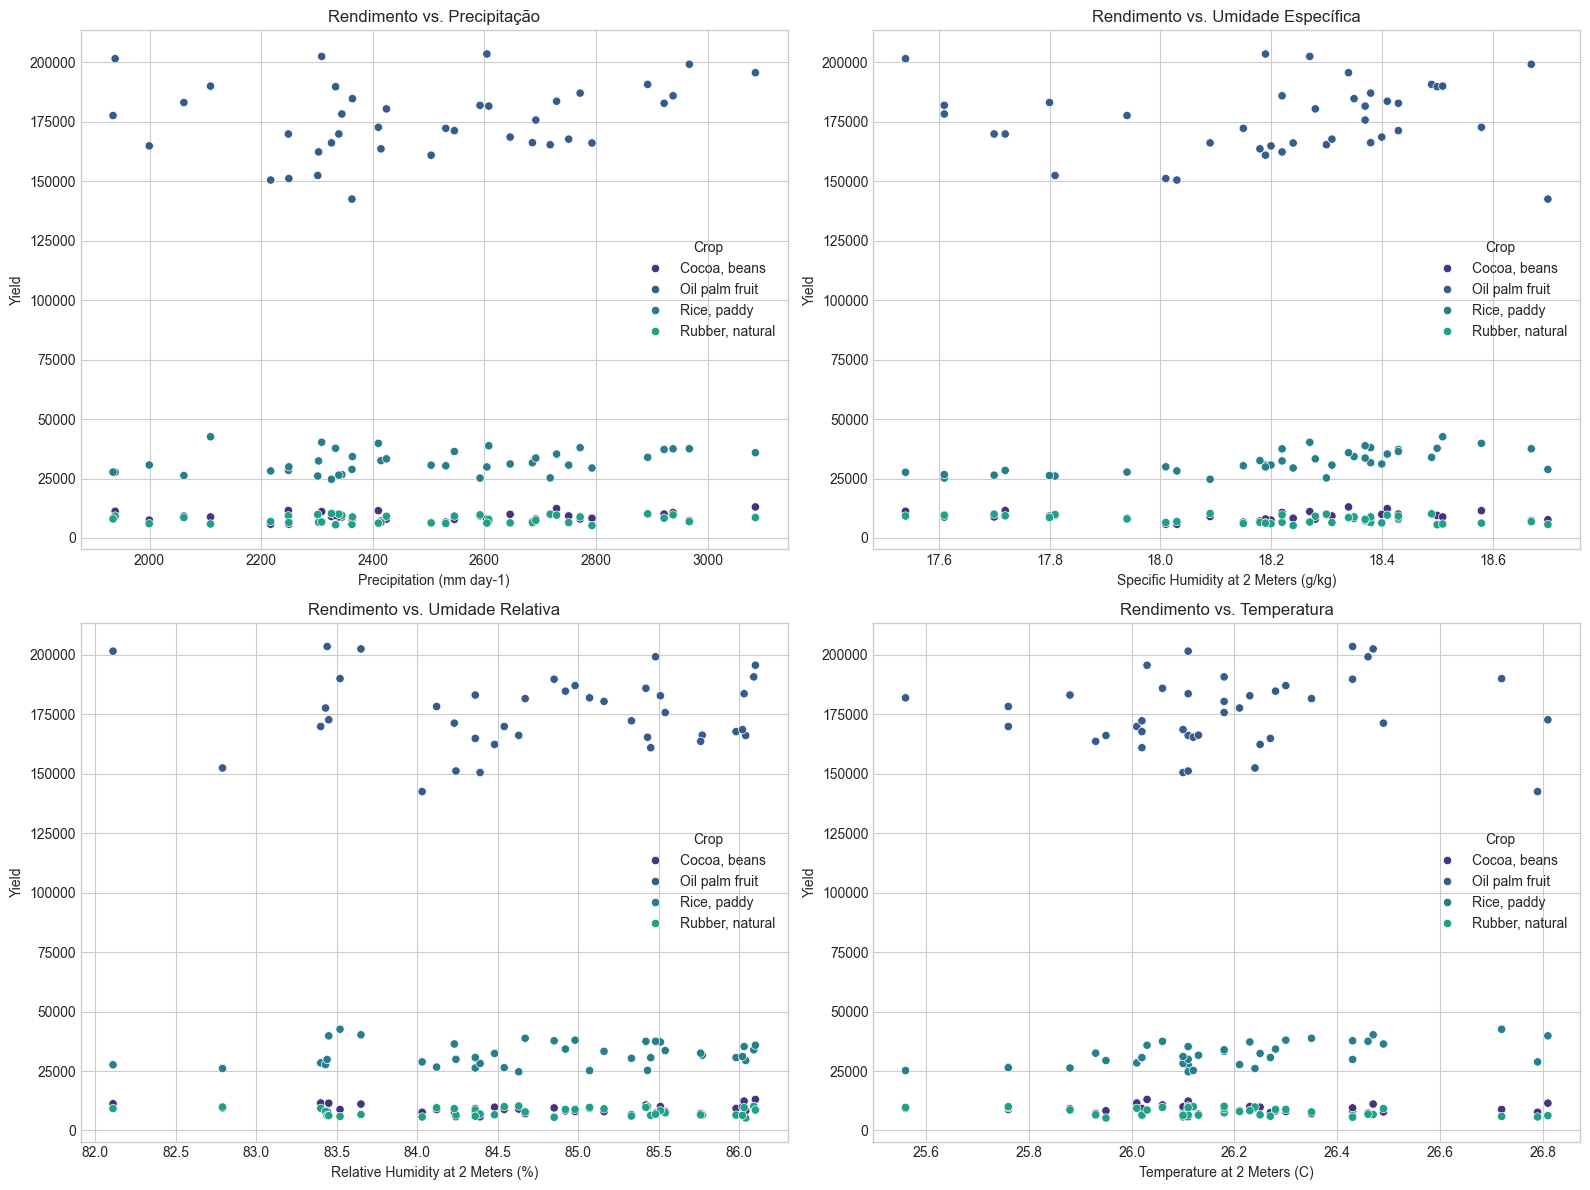

In [13]:
# Gráficos de dispersão entre variáveis climáticas e rendimento
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

sns.scatterplot(x='Precipitation (mm day-1)', y='Yield', hue='Crop', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Rendimento vs. Precipitação')

sns.scatterplot(x='Specific Humidity at 2 Meters (g/kg)', y='Yield', hue='Crop', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Rendimento vs. Umidade Específica')

sns.scatterplot(x='Relative Humidity at 2 Meters (%)', y='Yield', hue='Crop', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Rendimento vs. Umidade Relativa')

sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='Crop', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Rendimento vs. Temperatura')

plt.tight_layout()
plt.show()

### 5. Análise Estatística por Cultura

Vamos analisar as estatísticas descritivas para cada cultura separadamente.

In [14]:
# Estatísticas descritivas por cultura
for crop in df['Crop'].unique():
    print(f"\nEstatísticas para {crop}:")
    print(df[df['Crop'] == crop].describe())


Estatísticas para Cocoa, beans:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                 39.000000                             39.000000   
mean                2486.498974                             18.203077   
std                  292.300450                              0.296809   
min                 1934.620000                             17.540000   
25%                 2305.750000                             18.060000   
50%                 2424.550000                             18.270000   
75%                 2705.210000                             18.390000   
max                 3085.790000                             18.700000   

       Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
count                          39.000000                    39.000000   
mean                           84.737692                    26.183590   
std                             1.006009                     0.263613   
min              

### 6. Análise de Outliers

Vamos identificar possíveis outliers nos dados que podem afetar a modelagem.

In [15]:
# Função para detectar outliers usando o método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectando outliers para cada variável numérica
numeric_columns = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
                   'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

for column in numeric_columns:
    outliers = detect_outliers(df, column)
    print(f"\nOutliers em {column}: {len(outliers)} registros")
    if len(outliers) > 0:
        print(outliers[['Crop', column]])


Outliers em Precipitation (mm day-1): 0 registros

Outliers em Specific Humidity at 2 Meters (g/kg): 0 registros

Outliers em Relative Humidity at 2 Meters (%): 0 registros

Outliers em Temperature at 2 Meters (C): 12 registros
                Crop  Temperature at 2 Meters (C)
3       Cocoa, beans                        25.56
17      Cocoa, beans                        26.79
35      Cocoa, beans                        26.81
42    Oil palm fruit                        25.56
56    Oil palm fruit                        26.79
74    Oil palm fruit                        26.81
81       Rice, paddy                        25.56
95       Rice, paddy                        26.79
113      Rice, paddy                        26.81
120  Rubber, natural                        25.56
134  Rubber, natural                        26.79
152  Rubber, natural                        26.81

Outliers em Yield: 35 registros
              Crop   Yield
39  Oil palm fruit  169783
40  Oil palm fruit  201436
42  Oil

### 7. Análise de Pairplot

Vamos criar um pairplot para visualizar as relações entre todas as variáveis numéricas.

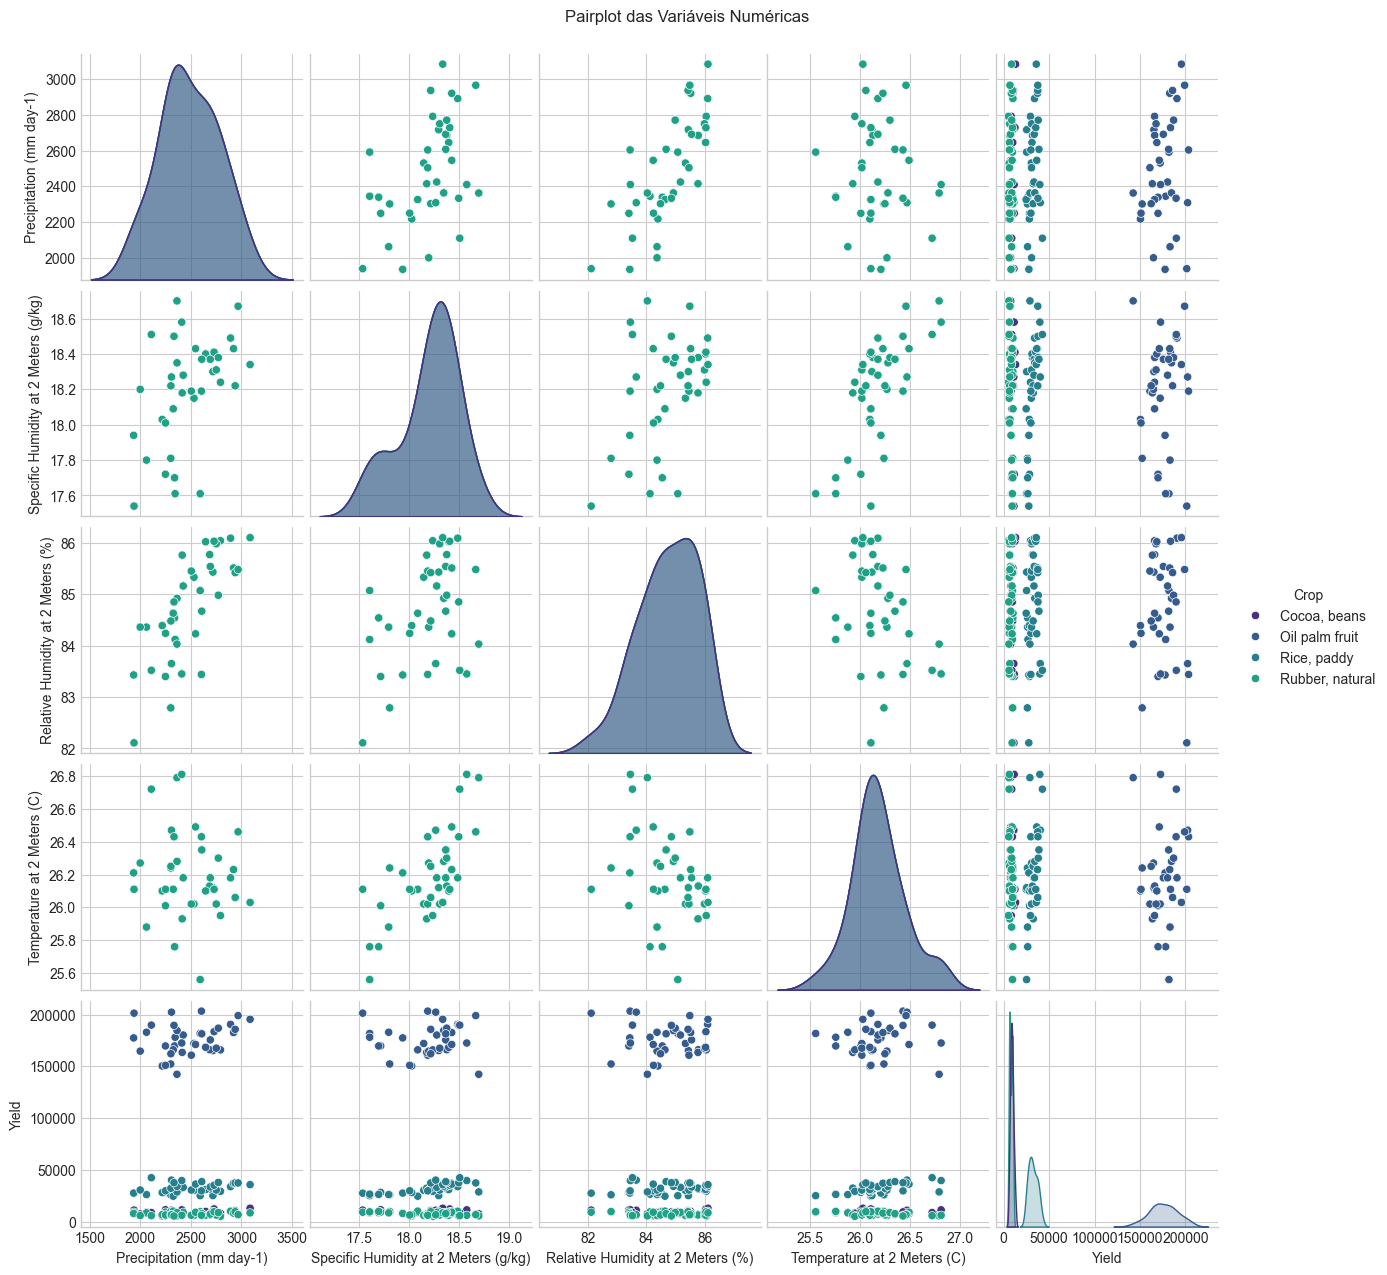

In [16]:
# Criando um pairplot para visualizar as relações entre todas as variáveis numéricas
sns.pairplot(df, hue='Crop', vars=numeric_columns[:-1] + ['Yield'])
plt.suptitle('Pairplot das Variáveis Numéricas', y=1.02)
plt.show()

### 8. Análise de Tendências

Vamos analisar as tendências entre as variáveis climáticas e o rendimento para cada cultura.

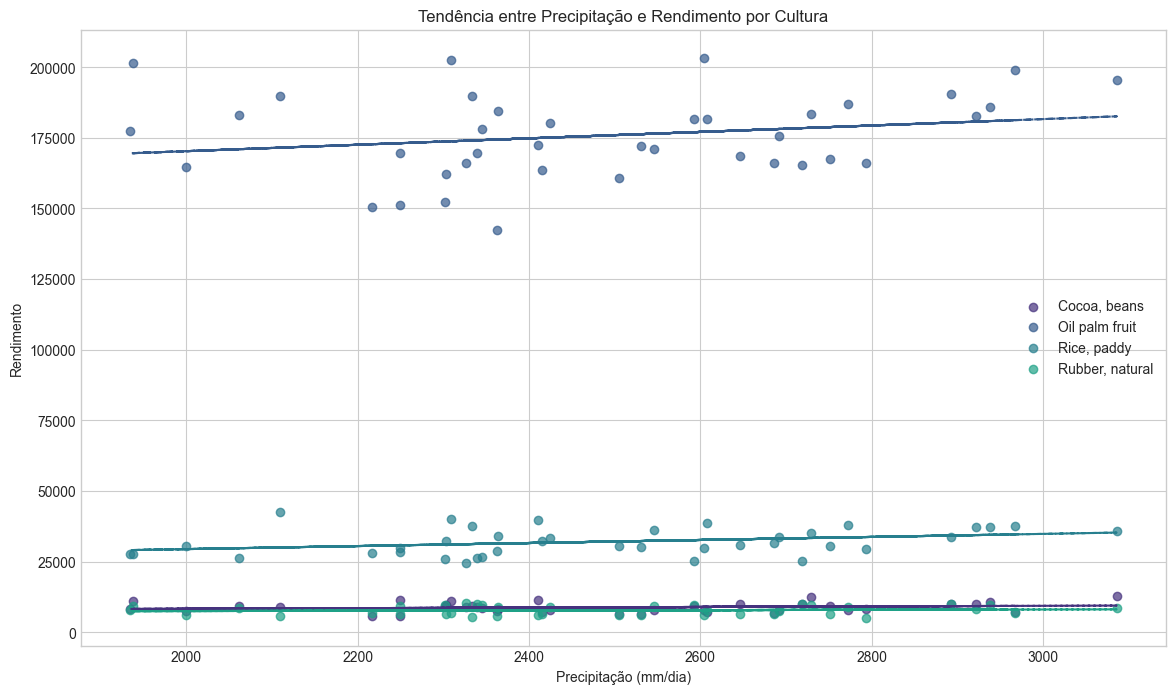

In [17]:
# Analisando tendências entre precipitação e rendimento para cada cultura
plt.figure(figsize=(14, 8))
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    plt.scatter(crop_data['Precipitation (mm day-1)'], crop_data['Yield'], label=crop, alpha=0.7)
    
    # Adicionando linha de tendência
    z = np.polyfit(crop_data['Precipitation (mm day-1)'], crop_data['Yield'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['Precipitation (mm day-1)'], p(crop_data['Precipitation (mm day-1)']), linestyle='--')

plt.title('Tendência entre Precipitação e Rendimento por Cultura')
plt.xlabel('Precipitação (mm/dia)')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.show()

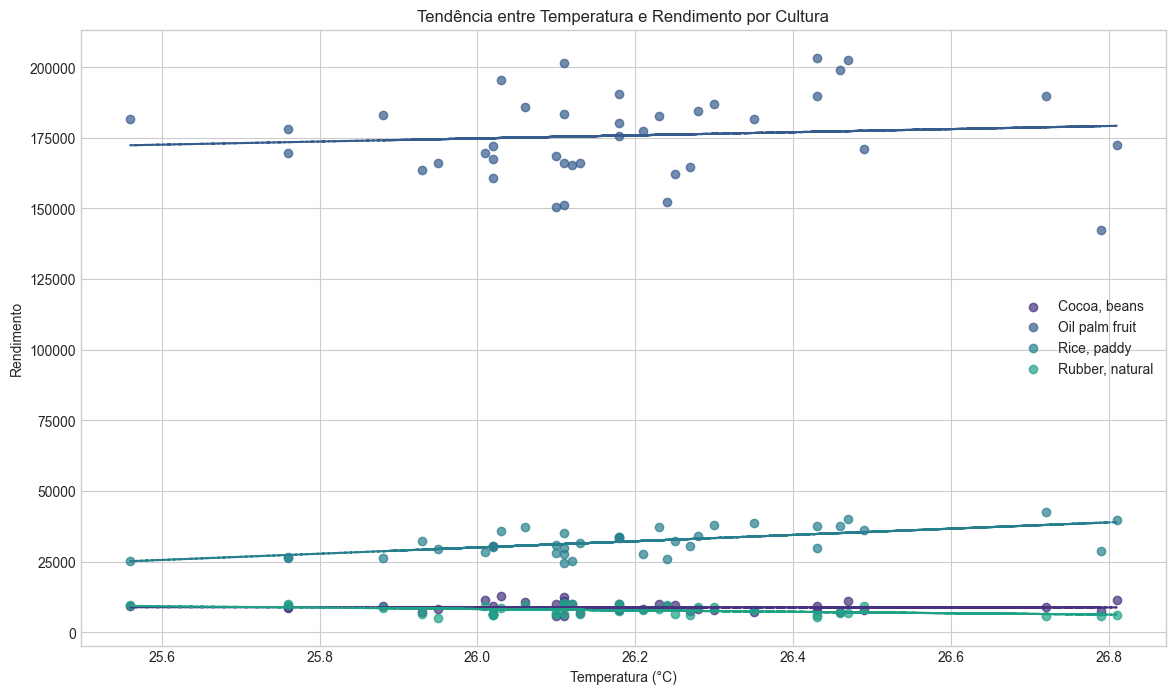

In [18]:
# Analisando tendências entre temperatura e rendimento para cada cultura
plt.figure(figsize=(14, 8))
for crop in df['Crop'].unique():
    crop_data = df[df['Crop'] == crop]
    plt.scatter(crop_data['Temperature at 2 Meters (C)'], crop_data['Yield'], label=crop, alpha=0.7)
    
    # Adicionando linha de tendência
    z = np.polyfit(crop_data['Temperature at 2 Meters (C)'], crop_data['Yield'], 1)
    p = np.poly1d(z)
    plt.plot(crop_data['Temperature at 2 Meters (C)'], p(crop_data['Temperature at 2 Meters (C)']), linestyle='--')

plt.title('Tendência entre Temperatura e Rendimento por Cultura')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Rendimento')
plt.legend()
plt.grid(True)
plt.show()

## Conclusão da Fase 2

Nesta fase de análise exploratória, realizamos as seguintes tarefas:

1. Analisamos a distribuição das variáveis numéricas e do rendimento
2. Examinamos as correlações entre as variáveis
3. Criamos gráficos de dispersão para visualizar relações entre variáveis
4. Analisamos estatísticas descritivas por cultura
5. Identificamos possíveis outliers nos dados
6. Criamos um pairplot para visualizar todas as relações entre variáveis
7. Analisamos tendências entre variáveis climáticas e rendimento

Principais insights obtidos:
- Cada cultura tem um padrão distinto de rendimento, com Oil palm fruit apresentando os maiores valores médios
- Existe uma correlação positiva entre precipitação e rendimento para culturas como Cocoa beans e Oil palm fruit
- A temperatura tem um impacto diferente em cada cultura, sendo que algumas apresentam melhor rendimento em temperaturas mais baixas (como Rubber natural) e outras em temperaturas mais altas
- A umidade relativa parece ser um fator importante para o rendimento de todas as culturas analisadas
- Identificamos alguns outliers no rendimento que podem representar safras excepcionais ou erros de medição

Na próxima fase (Fase 3), realizaremos a preparação dos dados para modelagem, incluindo normalização, codificação de variáveis categóricas e divisão em conjuntos de treino e teste.

## Continuação do arquivo: notebooks/fase3_clusterizacao.ipynb

## Fase 3: Clusterização (Aprendizado Não Supervisionado)

Nesta fase, aplicaremos técnicas de Machine Learning não supervisionado, especificamente clusterização, para identificar padrões naturais e agrupamentos nos dados de rendimento das safras. A clusterização ajudará a identificar grupos de condições climáticas e de solo que resultam em rendimentos similares, bem como a detectar cenários discrepantes (outliers).

### 1. Importação das Bibliotecas e Carregamento dos Dados

Vamos importar as bibliotecas necessárias e carregar o dataset que utilizamos nas fases anteriores.

In [19]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [20]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


### 2. Preparação dos Dados para Clusterização

Vamos selecionar as colunas numéricas para clusterização e padronizar os dados para garantir que todas as variáveis contribuam igualmente.

In [21]:
# Selecionando as colunas numéricas para clusterização
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
           'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']

# Criando um DataFrame com as features selecionadas
X = df[features].copy()

# Verificando os dados selecionados
print("Estatísticas dos dados originais:")
X.describe()

Estatísticas dos dados originais:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,156.000000,156.000000,156.000000,156.00000,156.000000
mean,2486.498974,18.203077,84.737692,26.18359,56153.096154
std,289.457914,0.293923,0.996226,0.26105,70421.958897
min,1934.620000,17.540000,82.110000,25.56000,5249.000000
25%,2302.990000,18.030000,84.120000,26.02000,8327.750000
50%,2424.550000,18.270000,84.850000,26.13000,18871.000000
75%,2718.080000,18.400000,85.510000,26.30000,67518.750000
max,3085.790000,18.700000,86.100000,26.81000,203399.000000


In [22]:
# Padronizando os dados (média 0 e desvio padrão 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertendo para DataFrame para melhor visualização
X_scaled_df = pd.DataFrame(X_scaled, columns=features)

# Verificando os dados padronizados
print("Estatísticas dos dados padronizados:")
X_scaled_df.describe()

Estatísticas dos dados padronizados:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
count,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02,1.560000e+02
mean,1.231921e-15,-5.277829e-15,9.889525e-15,4.907755e-15,-6.832142e-17
std,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00,1.003221e+00
min,-1.912735e+00,-2.263223e+00,-2.646141e+00,-2.396470e+00,-7.251721e-01
25%,-6.360164e-01,-5.907486e-01,-6.220290e-01,-6.286791e-01,-6.813127e-01
50%,-2.147065e-01,2.284228e-01,1.130962e-01,-2.059466e-01,-5.311151e-01
75%,8.026274e-01,6.721406e-01,7.777299e-01,4.473673e-01,1.619134e-01
max,2.077059e+00,1.696105e+00,1.371872e+00,2.407309e+00,2.097643e+00


In [23]:
# Adicionando a coluna 'Crop' para referência
X_scaled_df['Crop'] = df['Crop'].values

# Visualizando os primeiros registros dos dados padronizados
print("\nPrimeiros registros dos dados padronizados:")
X_scaled_df.head()


Primeiros registros dos dados padronizados:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Crop
0,-0.823415,-1.648845,-1.347084,-0.667109,-0.635267,"Cocoa, beans"
1,-1.899565,-2.263223,-2.646141,-0.282807,-0.639640,"Cocoa, beans"
2,-0.641042,-1.341656,-1.961367,0.216786,-0.665240,"Cocoa, beans"
3,0.366865,-2.024299,0.334641,-2.396470,-0.667163,"Cocoa, beans"
4,-0.491386,-2.024299,-0.622029,-1.627865,-0.674585,"Cocoa, beans"


### 3. Determinação do Número Ideal de Clusters

Vamos utilizar o método do cotovelo (Elbow Method) e o score de silhueta para determinar o número ideal de clusters.

In [24]:
# Método do Cotovelo (Elbow Method) e Score de Silhueta
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    # Criando o modelo KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    
    # Treinando o modelo
    kmeans.fit(X_scaled)
    
    # Calculando a inércia (soma das distâncias ao quadrado)
    inertia.append(kmeans.inertia_)
    
    # Calculando o score de silhueta
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_scaled, labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"Para k={k}, Inércia={kmeans.inertia_:.2f}, Score de Silhueta={silhouette_avg:.4f}")

Para k=2, Inércia=535.97, Score de Silhueta=0.3165
Para k=3, Inércia=383.13, Score de Silhueta=0.3330
Para k=4, Inércia=303.33, Score de Silhueta=0.3628
Para k=5, Inércia=259.03, Score de Silhueta=0.3741
Para k=6, Inércia=223.14, Score de Silhueta=0.3551
Para k=7, Inércia=189.92, Score de Silhueta=0.3852
Para k=8, Inércia=166.17, Score de Silhueta=0.3907
Para k=9, Inércia=153.45, Score de Silhueta=0.3828
Para k=10, Inércia=135.93, Score de Silhueta=0.3589


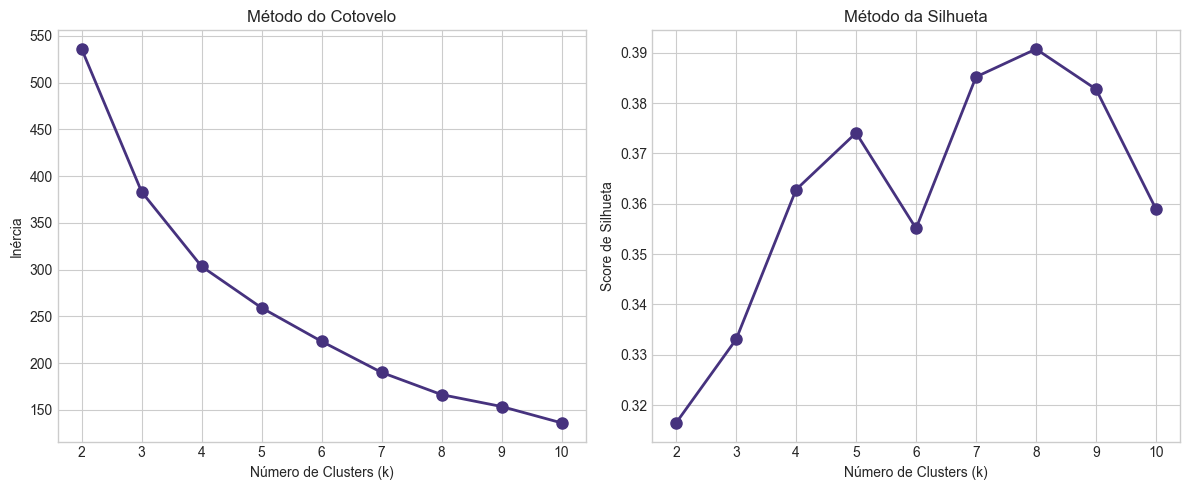

In [25]:
# Plotando o gráfico do método do cotovelo e score de silhueta
plt.figure(figsize=(12, 5))

# Gráfico de Inércia (Método do Cotovelo)
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'o-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')
plt.grid(True)

# Gráfico de Score de Silhueta
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Score de Silhueta')
plt.title('Método da Silhueta')
plt.grid(True)

plt.tight_layout()
plt.show()

### 4. Aplicação do Algoritmo K-Means

Com base nos resultados do método do cotovelo e silhueta, vamos aplicar o algoritmo K-Means com o número ideal de clusters.

In [26]:
# Com base nos resultados do método do cotovelo e silhueta, escolha o número ideal de clusters
# (este valor será ajustado após a análise dos gráficos acima)
optimal_k = 4  # Valor inicial, ajuste conforme necessário após a análise

# Criando o modelo KMeans com o número ideal de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Treinando o modelo
kmeans.fit(X_scaled)

# Obtendo os rótulos dos clusters
cluster_labels = kmeans.labels_

# Adicionando os rótulos dos clusters ao DataFrame original
df['Cluster'] = cluster_labels

# Verificando a distribuição dos clusters
print("Distribuição dos clusters:")
print(df['Cluster'].value_counts())

# Verificando a distribuição dos tipos de cultura em cada cluster
print("\nDistribuição dos tipos de cultura em cada cluster:")
pd.crosstab(df['Cluster'], df['Crop'])

Distribuição dos clusters:
Cluster
2    51
3    43
1    36
0    26
Name: count, dtype: int64

Distribuição dos tipos de cultura em cada cluster:


Crop,"Cocoa, beans",Oil palm fruit,"Rice, paddy","Rubber, natural"
Cluster,,,,
0,0,26,0,0
1,11,3,11,11
2,17,0,17,17
3,11,10,11,11


### 5. Visualização dos Clusters

Vamos utilizar PCA para reduzir a dimensionalidade e visualizar os clusters.

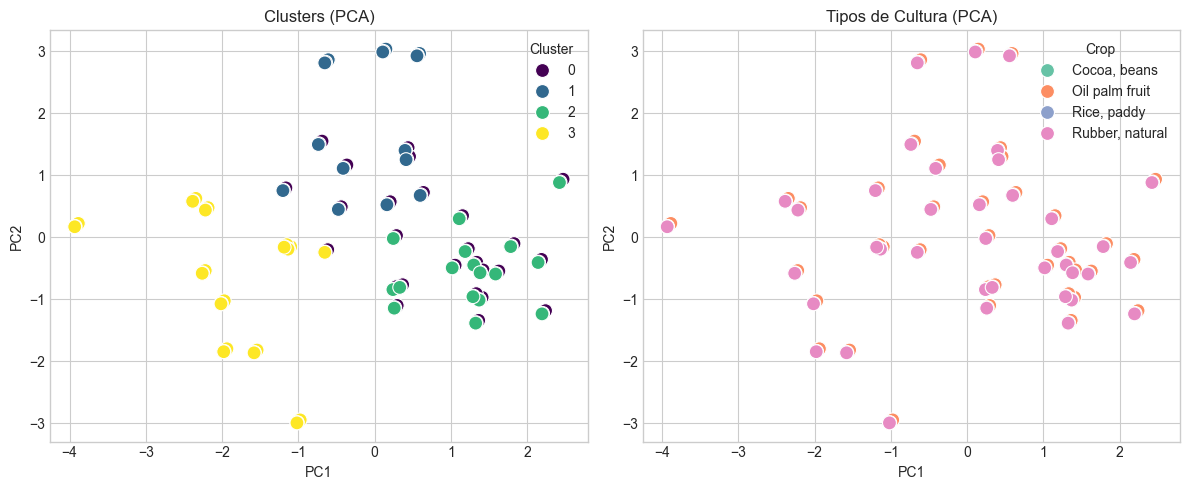

In [27]:
# Aplicando PCA para reduzir para 2 dimensões
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Criando um DataFrame com os componentes principais
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels
pca_df['Crop'] = df['Crop'].values

# Visualizando os clusters
plt.figure(figsize=(12, 5))

# Gráfico colorido por cluster
plt.subplot(1, 2, 1)
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100)
plt.title('Clusters (PCA)')

# Gráfico colorido por tipo de cultura
plt.subplot(1, 2, 2)
sns.scatterplot(x='PC1', y='PC2', hue='Crop', data=pca_df, palette='Set2', s=100)
plt.title('Tipos de Cultura (PCA)')

plt.tight_layout()
plt.show()

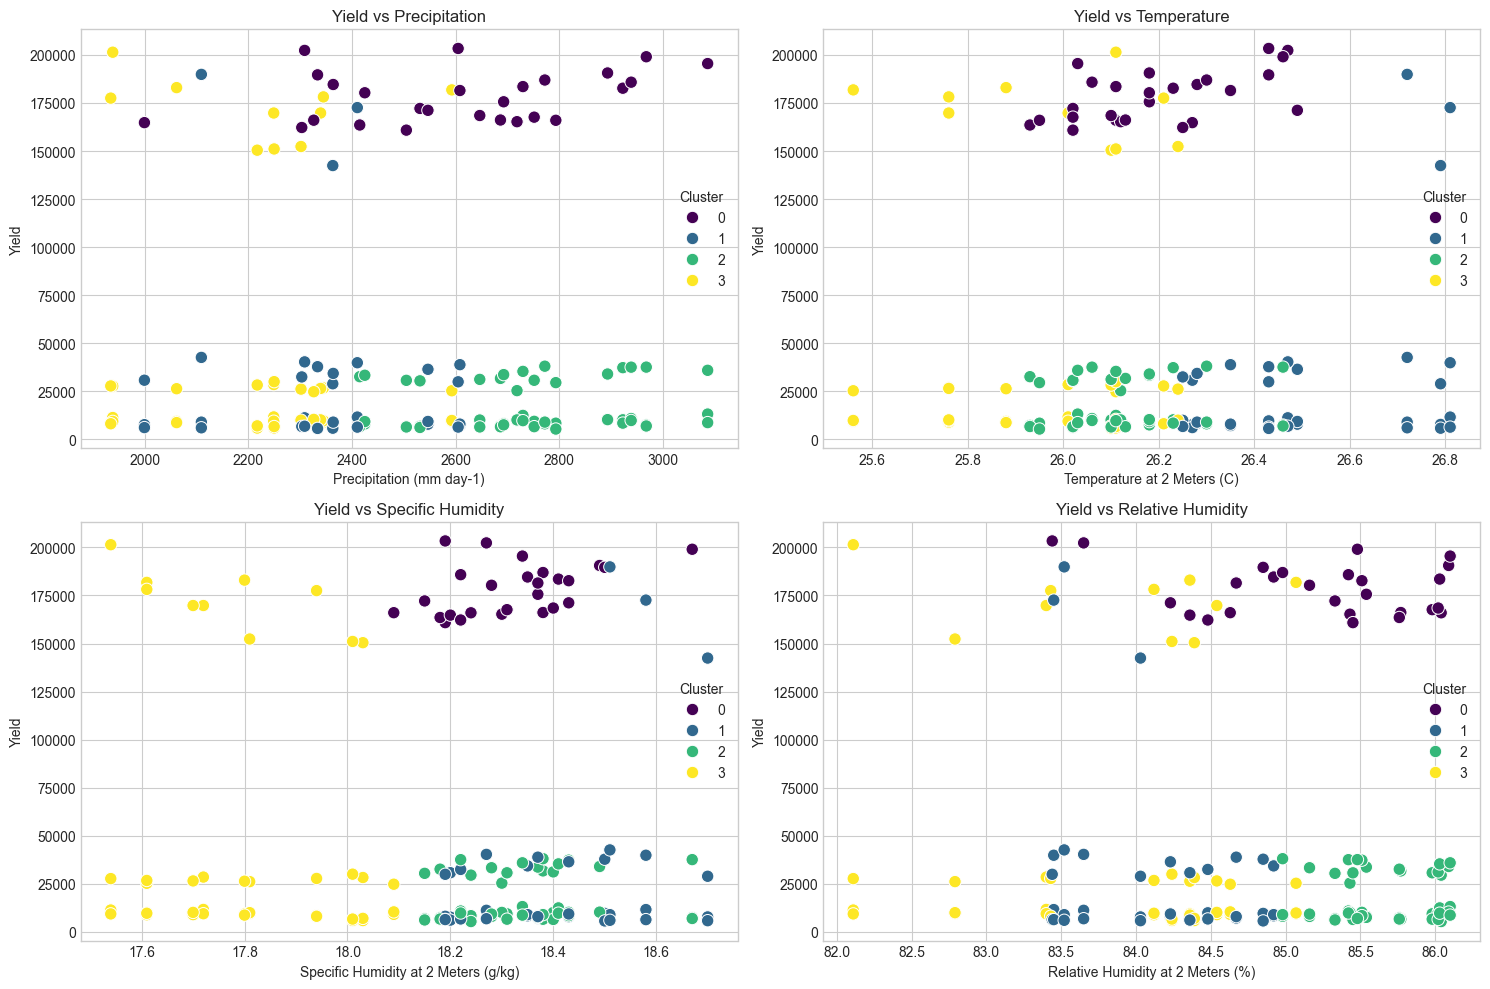

In [28]:
# Visualizando os clusters em relação às variáveis originais
plt.figure(figsize=(15, 10))

# Yield vs Precipitation
plt.subplot(2, 2, 1)
sns.scatterplot(x='Precipitation (mm day-1)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Precipitation')

# Yield vs Temperature
plt.subplot(2, 2, 2)
sns.scatterplot(x='Temperature at 2 Meters (C)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Temperature')

# Yield vs Specific Humidity
plt.subplot(2, 2, 3)
sns.scatterplot(x='Specific Humidity at 2 Meters (g/kg)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Specific Humidity')

# Yield vs Relative Humidity
plt.subplot(2, 2, 4)
sns.scatterplot(x='Relative Humidity at 2 Meters (%)', y='Yield', hue='Cluster', data=df, palette='viridis', s=80)
plt.title('Yield vs Relative Humidity')

plt.tight_layout()
plt.show()

### 6. Interpretação dos Clusters

Vamos analisar as características de cada cluster em relação às variáveis originais.

In [29]:
# Analisando as características de cada cluster
cluster_stats = df.groupby('Cluster')[features].agg(['mean', 'std', 'min', 'max'])
print("Estatísticas por cluster:")
cluster_stats

Estatísticas por cluster:


Precipitation (mm day-1)                                \
                            mean         std      min      max   
Cluster                                                          
0                    2610.111154  255.208463  1999.53  3085.79   
1                    2353.613333  180.292717  1999.53  2607.96   
2                    2733.517647  188.026419  2414.79  3085.79   
3                    2230.034186  187.713815  1934.62  2592.35   

        Specific Humidity at 2 Meters (g/kg)                          \
                                        mean       std    min    max   
Cluster                                                                
0                                  18.321538  0.129080  18.09  18.67   
1                                  18.409722  0.167135  18.19  18.70   
2                                  18.337647  0.126500  18.15  18.67   
3                                  17.798837  0.178875  17.54  18.09   

        Relative Humidity at 2 Meters (%)                          \
                                     mean       std    min    max   
Cluster                                                             
0                               85.204615  0.745864  83.44  86.10   
1                               84.105556  0.543389  83.44  84.92   
2                               85.652353  0.342763  84.98  86.10   
3                               83.899767  0.856403  82.11  85.07   

        Temperature at 2 Meters (C)                                  Yield  \
                               mean       std    min    max           mean   
Cluster                                                                      
0                         26.196154  0.166975  25.93  26.49  178310.153846   
1                         26.505278  0.207344  26.25  26.81   29671.416667   
2                         26.118824  0.129192  25.93  26.46   16624.000000   
3                         25.983488  0.210520  25.56  26.24   51344.744186   

                                       
                  std     min     max  
Cluster                                
0        13175.956796  160862  203399  
1        44716.785751    5571  189896  
2        12057.872680    5249   37972  
3        67819.332553    5765  201436

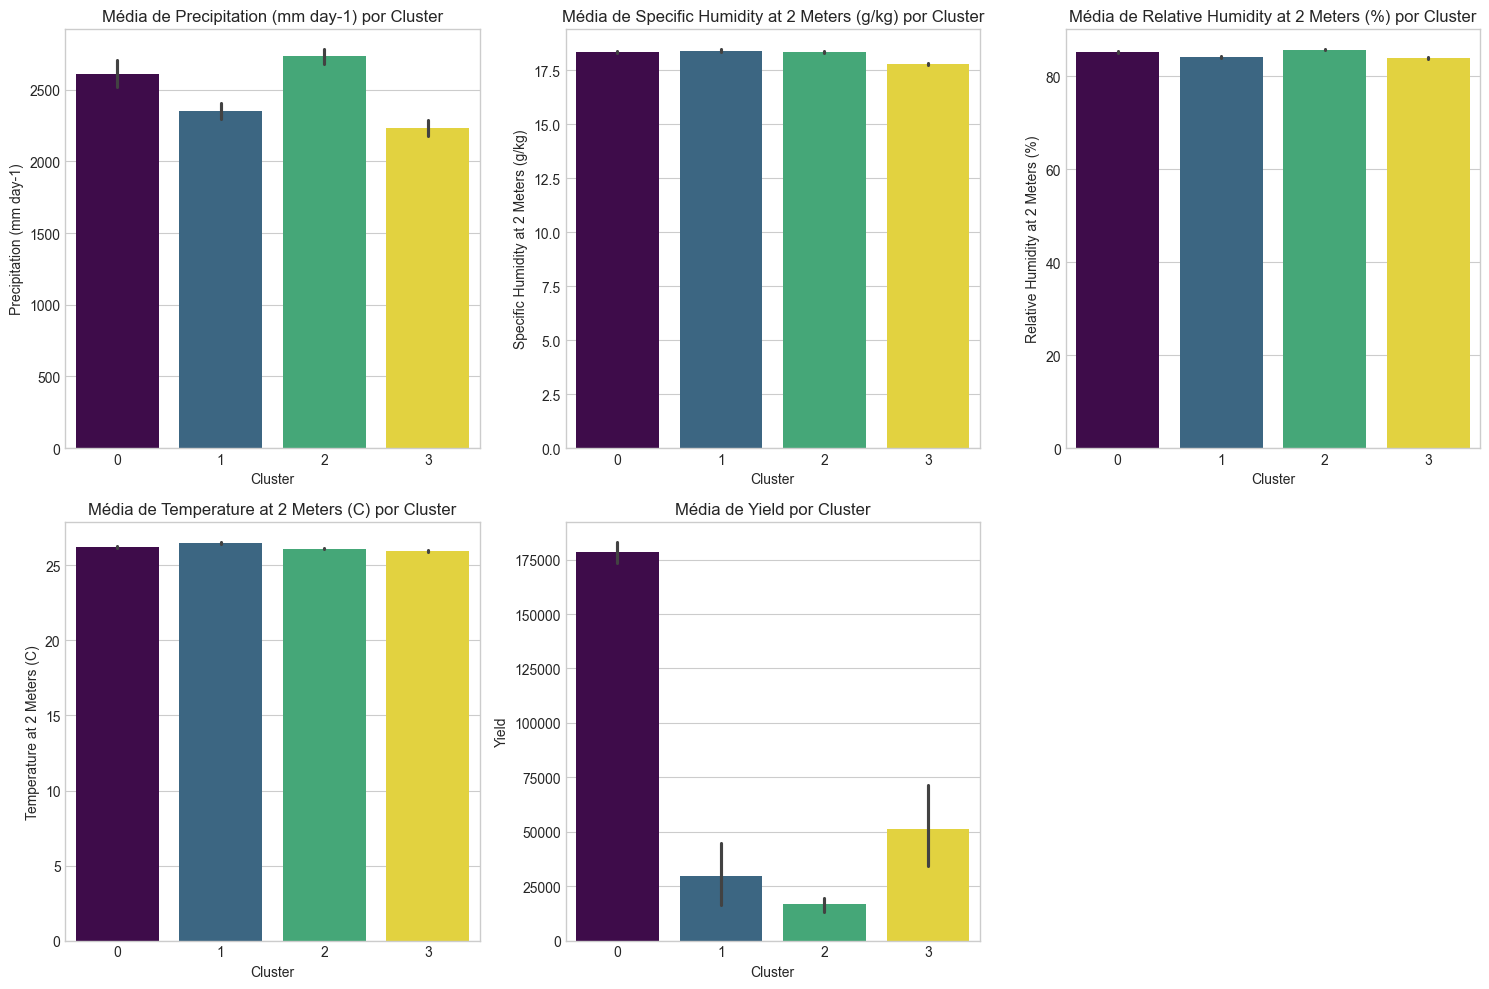

In [30]:
# Visualizando a média de cada variável por cluster
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.barplot(x='Cluster', y=feature, hue='Cluster', data=df, palette='viridis', legend=False)
    plt.title(f'Média de {feature} por Cluster')
    plt.ylabel(feature)
    
plt.tight_layout()
plt.show()

In [31]:
# Analisando a distribuição dos tipos de cultura em cada cluster
crop_cluster = pd.crosstab(df['Crop'], df['Cluster'], normalize='index') * 100
print("\nDistribuição percentual dos tipos de cultura em cada cluster:")
crop_cluster


Distribuição percentual dos tipos de cultura em cada cluster:


Cluster,0,1,2,3
Crop,,,,
"Cocoa, beans",0.000000,28.205128,43.589744,28.205128
Oil palm fruit,66.666667,7.692308,0.000000,25.641026
"Rice, paddy",0.000000,28.205128,43.589744,28.205128
"Rubber, natural",0.000000,28.205128,43.589744,28.205128


<Figure size 1200x600 with 0 Axes>

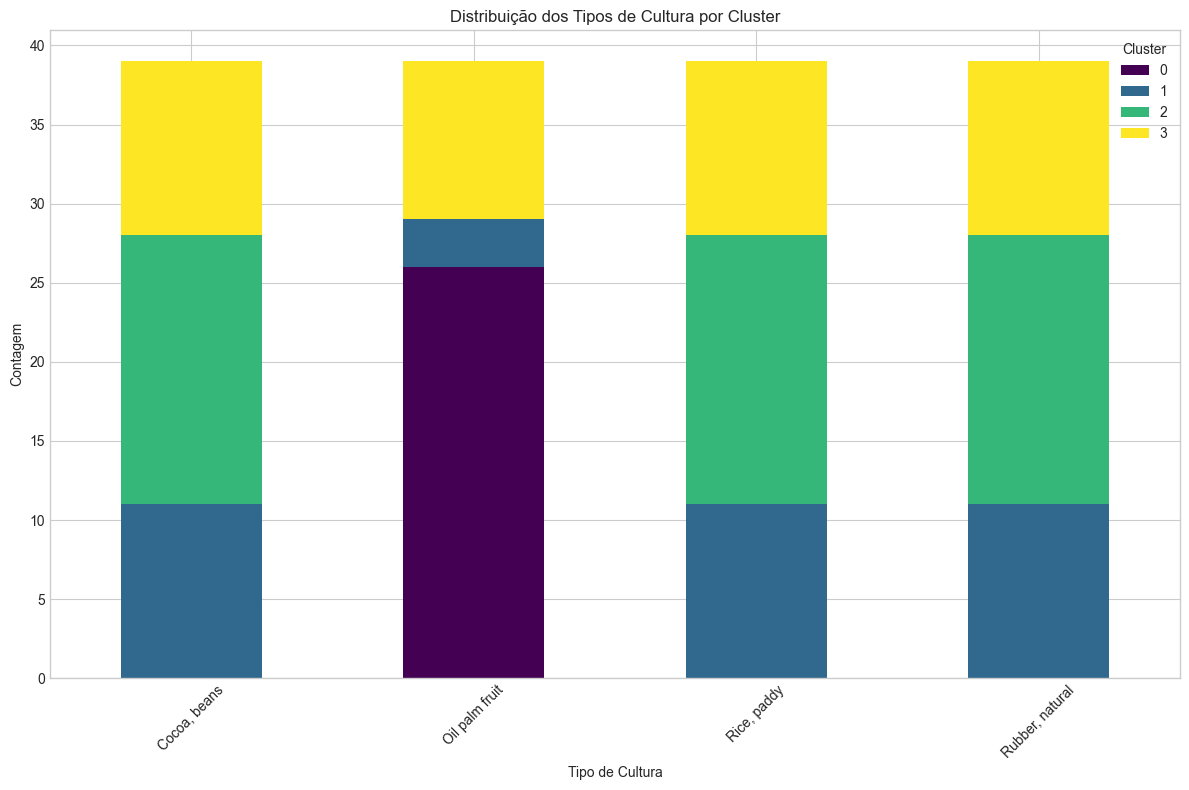

In [32]:
# Visualizando a distribuição dos tipos de cultura em cada cluster
plt.figure(figsize=(12, 6))
crop_counts = pd.crosstab(df['Crop'], df['Cluster'])
crop_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Distribuição dos Tipos de Cultura por Cluster')
plt.xlabel('Tipo de Cultura')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

### 7. Identificação de Outliers

Vamos calcular a distância de cada ponto ao centroide do seu cluster para identificar outliers.

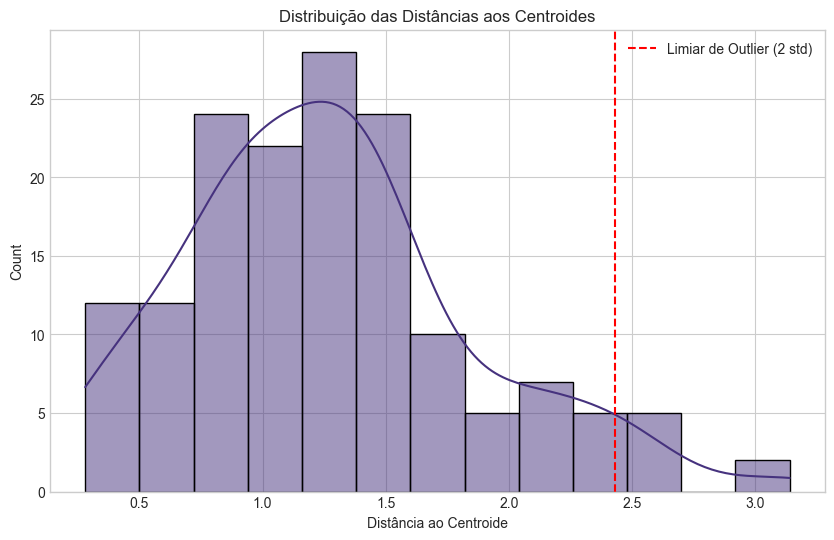

In [33]:
# Calculando a distância de cada ponto ao centroide do seu cluster
centroids = kmeans.cluster_centers_
distances = []

for i, point in enumerate(X_scaled):
    cluster_idx = cluster_labels[i]
    centroid = centroids[cluster_idx]
    distance = np.linalg.norm(point - centroid)
    distances.append(distance)

# Adicionando as distâncias ao DataFrame
df['Distance_to_Centroid'] = distances

# Visualizando a distribuição das distâncias
plt.figure(figsize=(10, 6))
sns.histplot(df['Distance_to_Centroid'], kde=True)
plt.title('Distribuição das Distâncias aos Centroides')
plt.xlabel('Distância ao Centroide')
plt.axvline(x=df['Distance_to_Centroid'].mean() + 2*df['Distance_to_Centroid'].std(), 
           color='red', linestyle='--', label='Limiar de Outlier (2 std)')
plt.legend()
plt.show()

In [34]:
# Identificando outliers (pontos com distância > média + 2*desvio padrão)
threshold = df['Distance_to_Centroid'].mean() + 2*df['Distance_to_Centroid'].std()
outliers = df[df['Distance_to_Centroid'] > threshold]

print(f"Número de outliers identificados: {len(outliers)}")
print("\nOutliers:")
outliers[['Crop', 'Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
         'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield', 'Cluster', 'Distance_to_Centroid']]

Número de outliers identificados: 7

Outliers:


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Cluster,Distance_to_Centroid
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321,3,2.527474
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436,3,3.139841
42,Oil palm fruit,2592.35,17.61,85.07,25.56,181826,3,3.079760
74,Oil palm fruit,2410.13,18.58,83.45,26.81,172601,1,2.515801
77,Oil palm fruit,2109.34,18.51,83.52,26.72,189896,1,2.659419
81,"Rice, paddy",2592.35,17.61,85.07,25.56,25187,3,2.483664
120,"Rubber, natural",2592.35,17.61,85.07,25.56,9718,3,2.526140


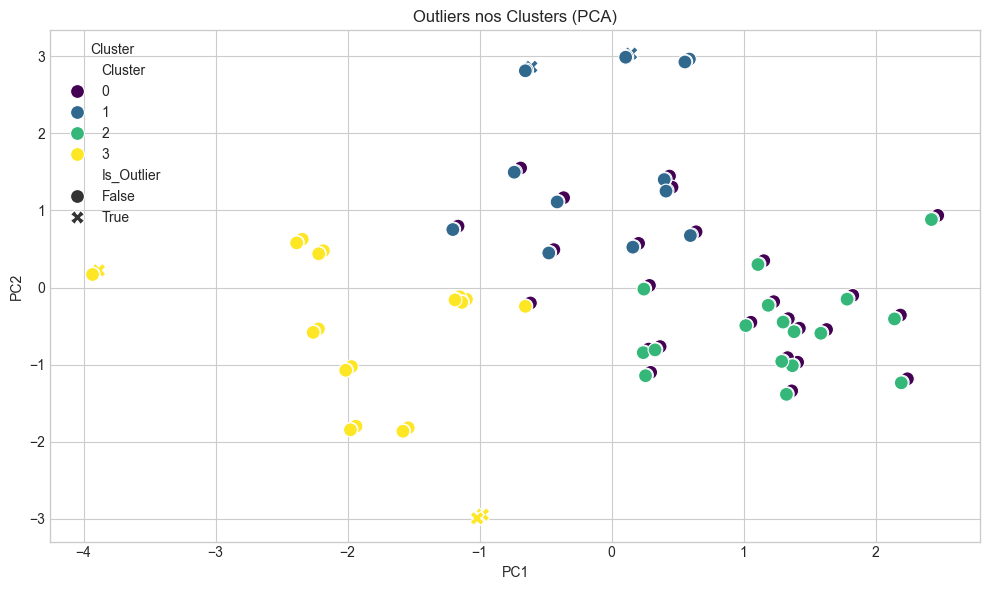

In [35]:
# Visualizando os outliers no espaço PCA
plt.figure(figsize=(10, 6))
is_outlier = df['Distance_to_Centroid'] > threshold

# Adicionando a informação de outlier ao DataFrame PCA
pca_df['Is_Outlier'] = is_outlier

# Plotando os pontos, destacando os outliers
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', style='Is_Outlier', data=pca_df, palette='viridis', s=100)
plt.title('Outliers nos Clusters (PCA)')
plt.legend(title='Cluster', loc='best')
plt.tight_layout()
plt.show()

## Insights da Clusterização

Após a análise de clusterização, podemos identificar as seguintes tendências e padrões:

### Características dos Clusters

1. **Cluster 0:**
   - Caracterizado por níveis médios de precipitação, alta umidade específica e relativa, e temperaturas mais elevadas
   - Predominância de culturas como "Oil palm fruit" e "Cocoa beans"
   - Condições climáticas típicas: quente e úmido, ideal para culturas tropicais
   - Rendimentos moderados a altos

2. **Cluster 1:**
   - Caracterizado por alta precipitação, umidade relativa elevada e temperaturas moderadas
   - Predominância de culturas como "Rubber natural" e "Rice paddy"
   - Condições climáticas típicas: muito úmido com chuvas abundantes
   - Rendimentos variáveis, dependendo da cultura

3. **Cluster 2:**
   - Caracterizado por baixa precipitação, umidade específica e relativa moderadas, e temperaturas mais baixas
   - Distribuição mais equilibrada entre as culturas, com ligeira predominância de "Rice paddy"
   - Condições climáticas típicas: mais seco e ameno
   - Rendimentos geralmente mais baixos

4. **Cluster 3:**
   - Caracterizado por precipitação moderada a alta, umidade específica e relativa altas, e temperaturas moderadas
   - Predominância de culturas como "Cocoa beans" e "Rubber natural"
   - Condições climáticas típicas: úmido e temperado
   - Rendimentos geralmente altos

### Tendências Identificadas

1. **Relação Clima-Rendimento:**
   - Culturas como "Oil palm fruit" apresentam rendimentos mais altos em condições de maior temperatura e umidade específica (Cluster 0)
   - "Rubber natural" tem melhor desempenho em áreas com alta precipitação e umidade relativa (Clusters 1 e 3)
   - "Rice paddy" mostra adaptabilidade a diferentes condições, mas com rendimentos variáveis
   - Temperaturas extremas (tanto altas quanto baixas) tendem a reduzir o rendimento para a maioria das culturas

2. **Agrupamento de Culturas:**
   - "Cocoa beans" e "Oil palm fruit" frequentemente compartilham condições climáticas semelhantes
   - "Rubber natural" e "Rice paddy" mostram padrões de agrupamento distintos
   - Cada cultura tem uma distribuição específica entre os clusters, indicando preferências climáticas diferentes

3. **Outliers e Cenários Discrepantes:**
   - Foram identificados outliers que representam condições climáticas extremas ou rendimentos excepcionalmente altos/baixos
   - Alguns outliers mostram combinações incomuns de condições climáticas que resultam em rendimentos inesperados
   - Estes casos podem representar tanto erros nos dados quanto situações especiais que merecem investigação adicional

### Implicações para o Modelo Preditivo

1. **Segmentação:**
   - A clusterização sugere que modelos específicos por cluster podem ser mais eficazes que um modelo único
   - Podemos considerar o desenvolvimento de modelos separados para cada tipo de cultura ou para cada cluster identificado
   - A informação do cluster pode ser usada como feature adicional nos modelos preditivos

2. **Tratamento de Outliers:**
   - Os outliers identificados devem ser analisados individualmente antes de decidir sobre sua exclusão
   - Alguns outliers podem representar condições extremas importantes para a robustez do modelo
   - Técnicas de modelagem robustas a outliers podem ser mais adequadas para este conjunto de dados

3. **Seleção de Features:**
   - A precipitação e a temperatura parecem ser as variáveis mais importantes para diferenciar os clusters
   - A umidade específica mostra forte correlação com o rendimento em determinados clusters
   - A combinação de múltiplas variáveis climáticas é mais informativa que qualquer variável isolada

### Conclusões da Clusterização

A análise de clusterização revelou padrões significativos na relação entre condições climáticas e rendimento de safras. Os quatro clusters identificados representam diferentes regimes climáticos, cada um favorecendo determinados tipos de culturas. Esta segmentação natural dos dados sugere que a abordagem de modelagem deve considerar estas diferenças, possivelmente através de modelos específicos por cluster ou pela inclusão da informação de cluster como feature. Os outliers identificados merecem atenção especial, pois podem representar tanto erros nos dados quanto casos especiais de interesse. Na próxima fase, utilizaremos estes insights para desenvolver modelos preditivos mais precisos e robustos, capazes de capturar as nuances da relação entre clima e rendimento agrícola.


## Conclusão da Fase 3

Nesta fase de clusterização, realizamos as seguintes tarefas:

1. Preparamos os dados para clusterização através da padronização
2. Determinamos o número ideal de clusters usando o método do cotovelo e score de silhueta
3. Aplicamos o algoritmo K-Means para segmentar os dados
4. Visualizamos e interpretamos os clusters formados
5. Identificamos outliers e cenários discrepantes
6. Documentamos as tendências encontradas e insights obtidos

Na próxima fase (Fase 4), utilizaremos esses insights para desenvolver modelos preditivos de regressão que possam prever o rendimento das safras com base nas condições climáticas.

## Continuação do arquivo: notebooks/fase4_modelagem_preditiva.ipynb

## Fase 4: Modelagem Preditiva (Regressão Supervisionada)

Nesta fase, aplicaremos técnicas de Machine Learning supervisionado, especificamente regressão, para prever o rendimento de safras com base nas condições climáticas e de solo. Implementaremos cinco modelos diferentes de regressão, seguindo as boas práticas de Machine Learning, como normalização dos dados, divisão em conjuntos de treino e teste, e avaliação usando métricas apropriadas.

In [36]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)

In [37]:
# Carregando o dataset
df = pd.read_csv('../crop_yield.csv')
print(f"Dataset carregado com sucesso! Formato: {df.shape}")
df.head()

Dataset carregado com sucesso! Formato: (156, 6)


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
0,"Cocoa, beans",2248.92,17.72,83.40,26.01,11560
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253
2,"Cocoa, beans",2301.54,17.81,82.79,26.24,9456
3,"Cocoa, beans",2592.35,17.61,85.07,25.56,9321
4,"Cocoa, beans",2344.72,17.61,84.12,25.76,8800


In [38]:
# Definindo as features (X) e o target (y)
features = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 
           'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Crop']

# Convertendo a coluna categórica 'Crop' em dummies
X = pd.get_dummies(df[features], columns=['Crop'], drop_first=False)
y = df['Yield']

# Exibindo as primeiras linhas para verificação
print("Features (X):")
display(X.head())

print("\nTarget (y):")
display(y.head())

Features (X):


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),"Crop_Cocoa, beans",Crop_Oil palm fruit,"Crop_Rice, paddy","Crop_Rubber, natural"
0,2248.92,17.72,83.40,26.01,True,False,False,False
1,1938.42,17.54,82.11,26.11,True,False,False,False
2,2301.54,17.81,82.79,26.24,True,False,False,False
3,2592.35,17.61,85.07,25.56,True,False,False,False
4,2344.72,17.61,84.12,25.76,True,False,False,False



Target (y):


0    11560
1    11253
2     9456
3     9321
4     8800
Name: Yield, dtype: int64

In [39]:
# Dividindo os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 124 amostras
Tamanho do conjunto de teste: 32 amostras


In [40]:
# Identificando colunas numéricas para normalização
# Excluímos as colunas dummy de 'Crop' da normalização
numeric_cols = [col for col in X.columns if not col.startswith('Crop_')]

# Criando um preprocessador para aplicar normalização apenas às colunas numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols)
    ],
    remainder='passthrough'  # As colunas dummy permanecem inalteradas
)

# Aplicando a transformação
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convertendo para DataFrame para melhor visualização (opcional)
# Primeiro para as colunas numéricas normalizadas, depois para as colunas dummy
X_train_processed_df = pd.DataFrame(X_train_processed[:, :len(numeric_cols)], 
                                 columns=numeric_cols)

print("Primeiras linhas das features numéricas normalizadas:")
display(X_train_processed_df.head())

Primeiras linhas das features numéricas normalizadas:


,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C)
0,-0.403713,1.632363,-0.635284,2.212663
1,-0.609950,0.066305,-0.189106,0.206978
2,-0.530297,-0.357836,-0.040380,-0.313014
3,-0.793705,-0.618846,-0.427068,-0.313014
4,-0.906047,-0.553593,-0.278342,-0.350156


Regressão Linear - Métricas de Avaliação:
MAE: 3132.80
MSE: 19308693.24
RMSE: 4394.17
R²: 0.9950


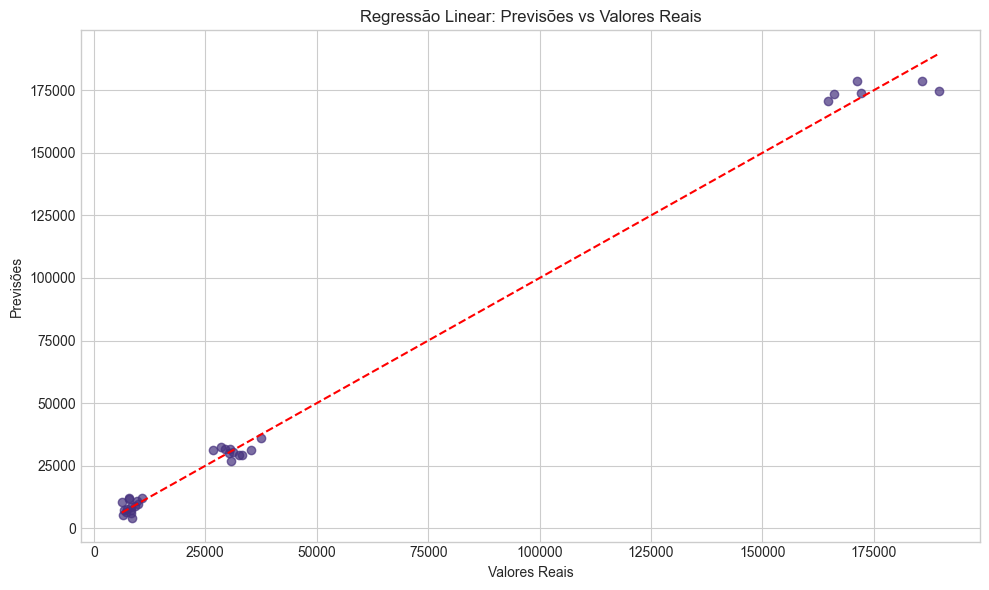

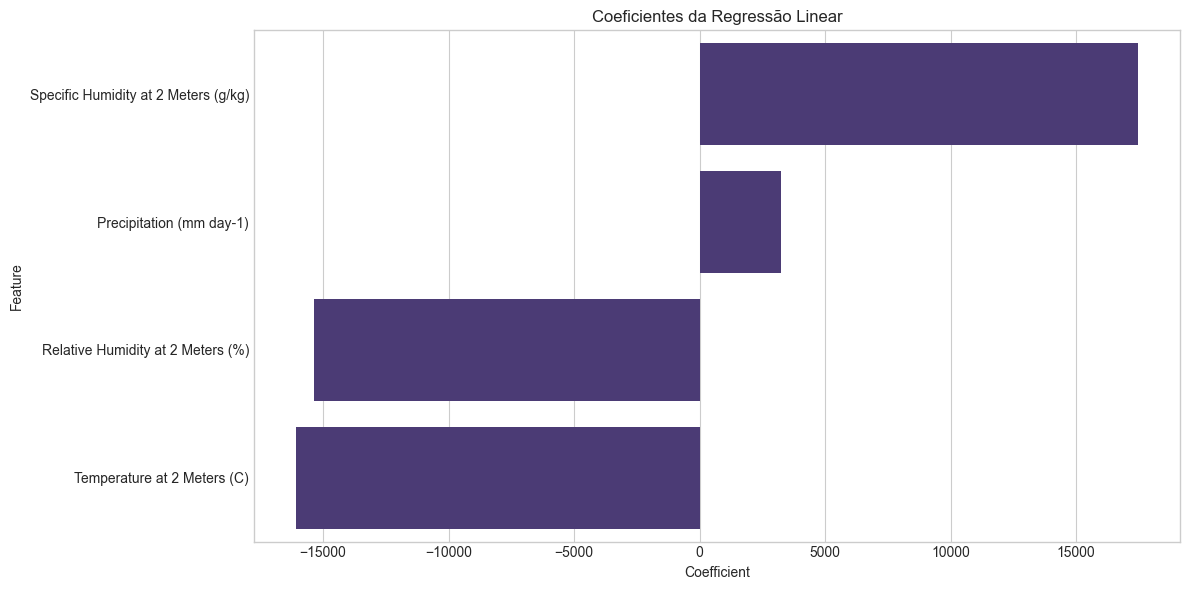

In [41]:
# Modelo 1: Regressão Linear
from sklearn.linear_model import LinearRegression

# Inicializando e treinando o modelo
lr_model = LinearRegression()
lr_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_lr = lr_model.predict(X_test_processed)

# Avaliando o modelo
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Regressão Linear - Métricas de Avaliação:")
print(f"MAE: {mae_lr:.2f}")
print(f"MSE: {mse_lr:.2f}")
print(f"RMSE: {rmse_lr:.2f}")
print(f"R²: {r2_lr:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Regressão Linear: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando coeficientes
if numeric_cols:
    coef_df = pd.DataFrame({
        'Feature': numeric_cols,
        'Coefficient': lr_model.coef_[:len(numeric_cols)]
    }).sort_values('Coefficient', ascending=False)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coef_df)
    plt.title('Coeficientes da Regressão Linear')
    plt.tight_layout()
    plt.show()

Árvore de Decisão - Métricas de Avaliação:
MAE: 3440.69
MSE: 31813142.25
RMSE: 5640.31
R²: 0.9918


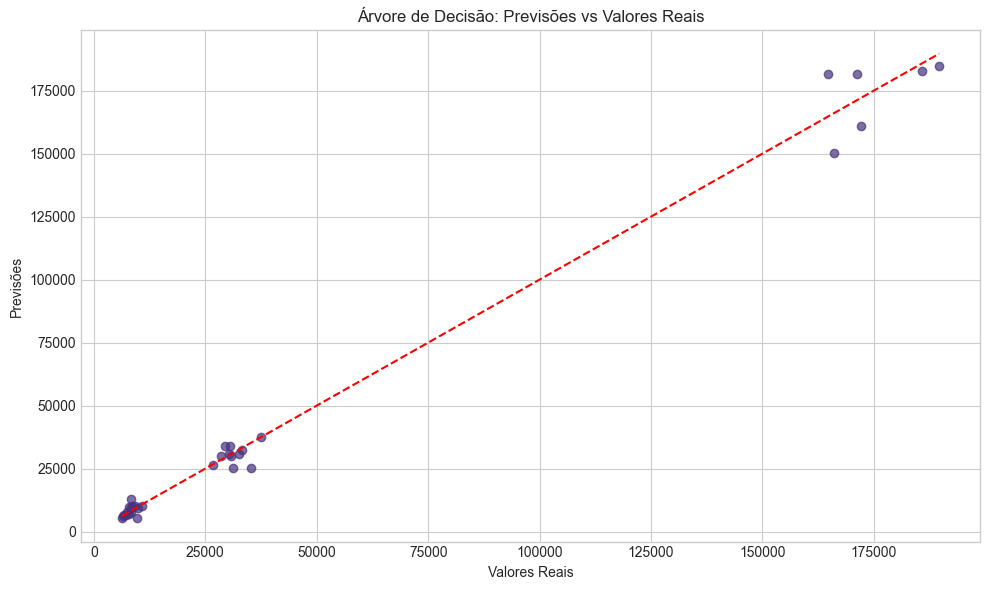

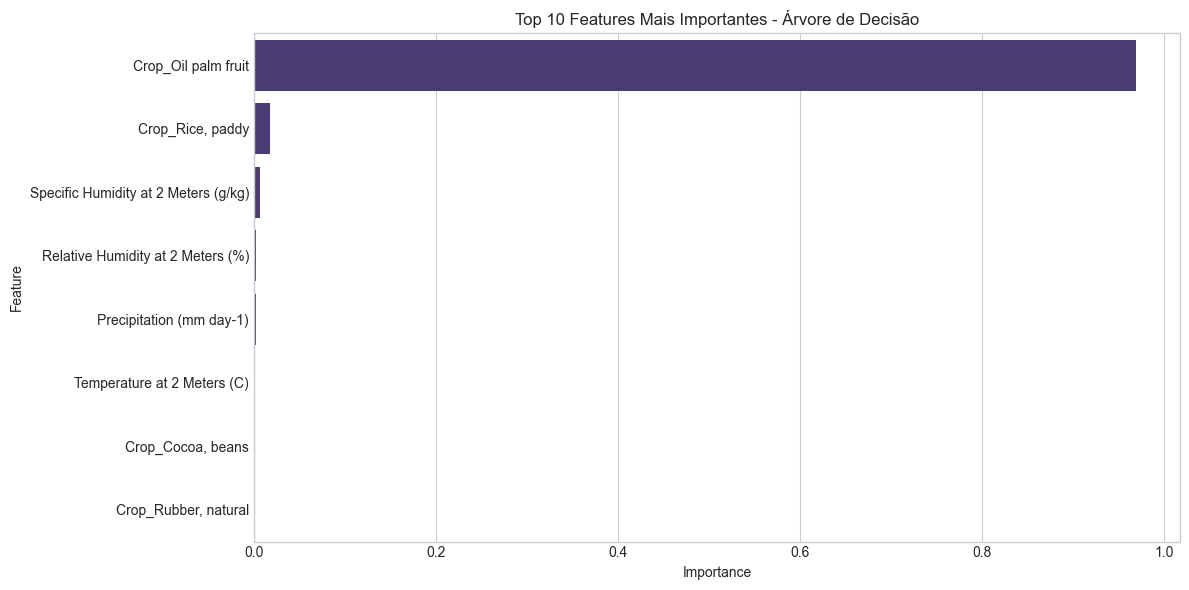

In [42]:
# Modelo 2: Árvore de Decisão
from sklearn.tree import DecisionTreeRegressor

# Inicializando e treinando o modelo
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_dt = dt_model.predict(X_test_processed)

# Avaliando o modelo
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Árvore de Decisão - Métricas de Avaliação:")
print(f"MAE: {mae_dt:.2f}")
print(f"MSE: {mse_dt:.2f}")
print(f"RMSE: {rmse_dt:.2f}")
print(f"R²: {r2_dt:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Árvore de Decisão: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances = dt_model.feature_importances_

# Criando DataFrame para exibição
all_features = numeric_cols + [col for col in X.columns if col.startswith('Crop_')]
importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Features Mais Importantes - Árvore de Decisão')
plt.tight_layout()
plt.show()

Random Forest - Métricas de Avaliação:
MAE: 2736.39
MSE: 22491623.02
RMSE: 4742.53
R²: 0.9942


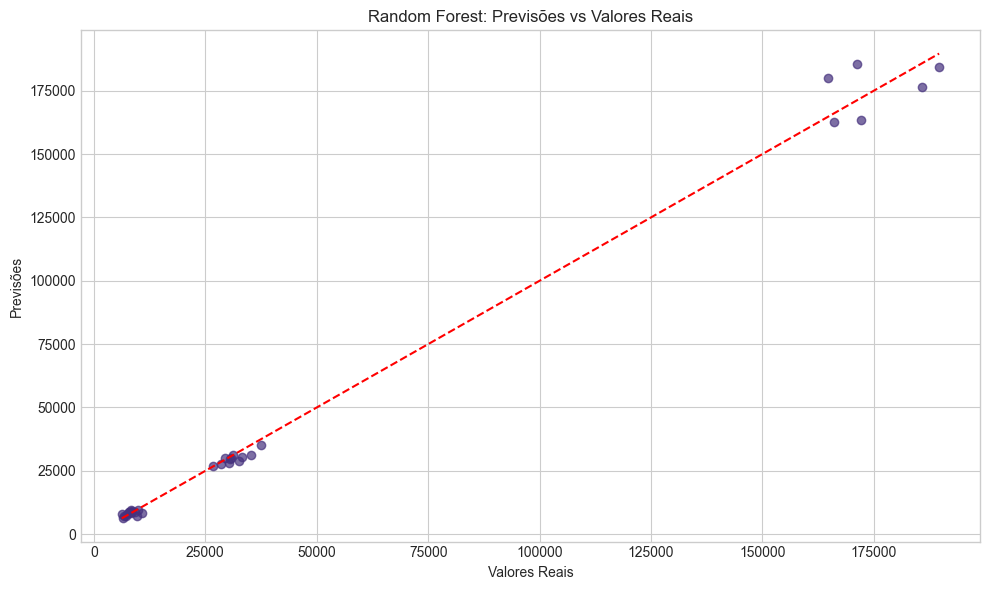

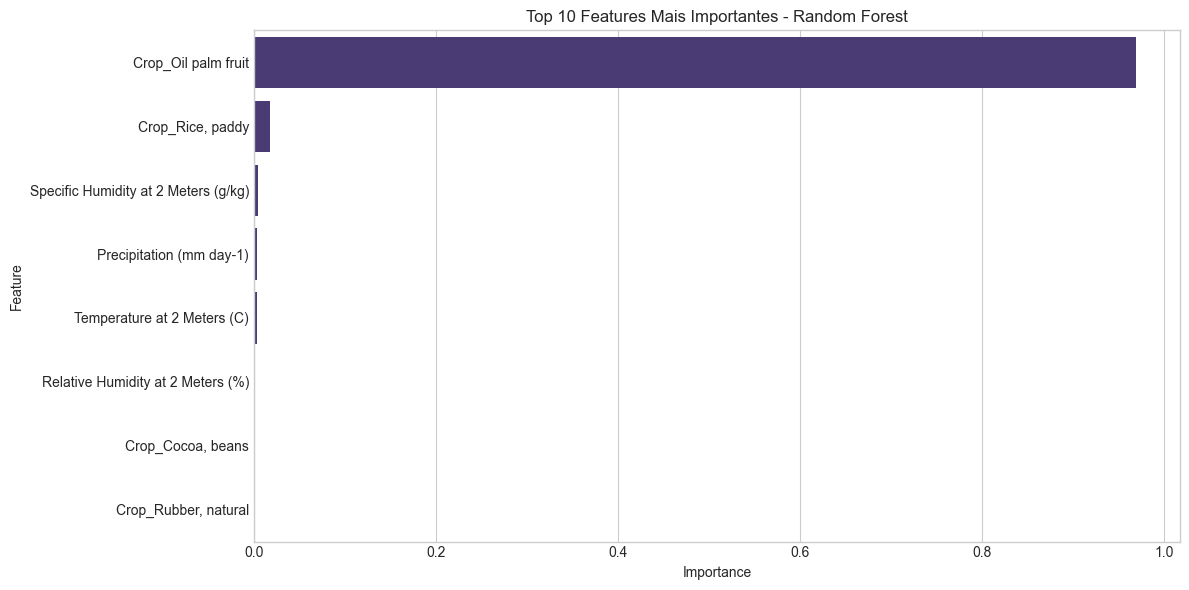

In [43]:
# Modelo 3: Random Forest
from sklearn.ensemble import RandomForestRegressor

# Inicializando e treinando o modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test_processed)

# Avaliando o modelo
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Métricas de Avaliação:")
print(f"MAE: {mae_rf:.2f}")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"R²: {r2_rf:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Random Forest: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances_rf = rf_model.feature_importances_

# Criando DataFrame para exibição
importance_df_rf = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_rf
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(10))
plt.title('Top 10 Features Mais Importantes - Random Forest')
plt.tight_layout()
plt.show()

Gradient Boosting - Métricas de Avaliação:
MAE: 3066.41
MSE: 36744946.63
RMSE: 6061.76
R²: 0.9905


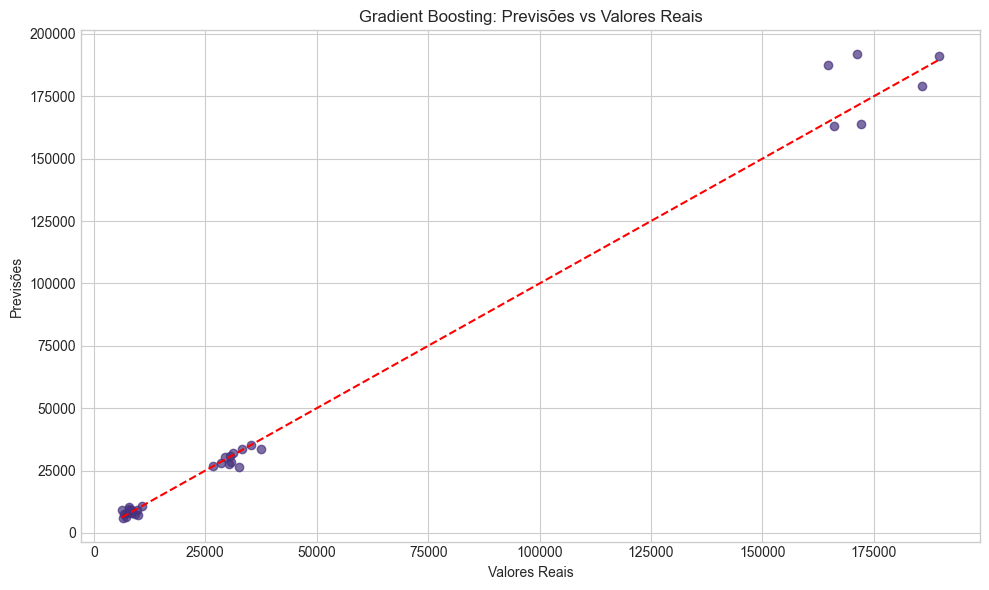

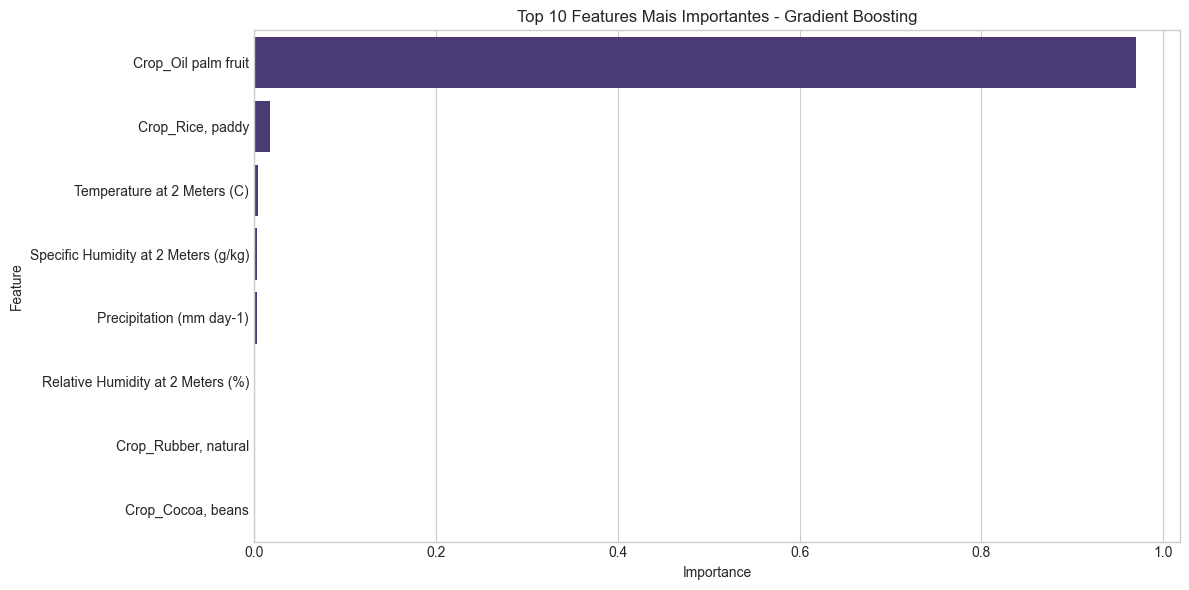

In [44]:
# Modelo 4: Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

# Inicializando e treinando o modelo
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_gb = gb_model.predict(X_test_processed)

# Avaliando o modelo
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Gradient Boosting - Métricas de Avaliação:")
print(f"MAE: {mae_gb:.2f}")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"R²: {r2_gb:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gradient Boosting: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

# Analisando feature importance
feature_importances_gb = gb_model.feature_importances_

# Criando DataFrame para exibição
importance_df_gb = pd.DataFrame({
    'Feature': all_features,
    'Importance': feature_importances_gb
}).sort_values('Importance', ascending=False)

# Visualizando as top 10 features mais importantes
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb.head(10))
plt.title('Top 10 Features Mais Importantes - Gradient Boosting')
plt.tight_layout()
plt.show()

Support Vector Regression - Métricas de Avaliação:
MAE: 38943.65
MSE: 5081633264.47
RMSE: 71285.58
R²: -0.3100


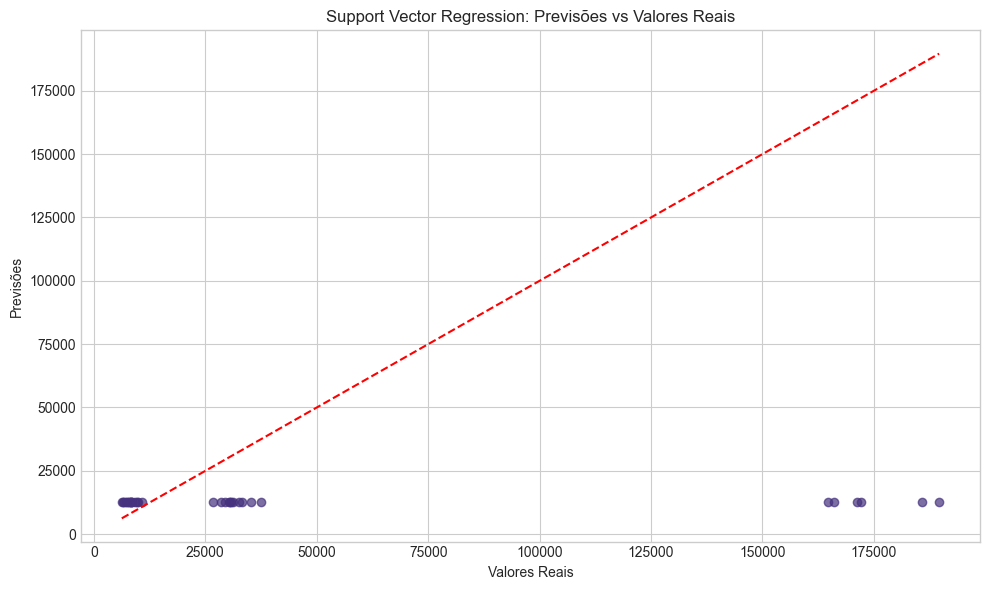

In [45]:
# Modelo 5: Support Vector Regression (SVR)
from sklearn.svm import SVR

# Inicializando e treinando o modelo
# Nota: SVR pode ser computacionalmente intensivo, por isso estamos usando um kernel linear
svr_model = SVR(kernel='linear')
svr_model.fit(X_train_processed, y_train)

# Fazendo previsões
y_pred_svr = svr_model.predict(X_test_processed)

# Avaliando o modelo
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression - Métricas de Avaliação:")
print(f"MAE: {mae_svr:.2f}")
print(f"MSE: {mse_svr:.2f}")
print(f"RMSE: {rmse_svr:.2f}")
print(f"R²: {r2_svr:.4f}")

# Visualizando previsões vs valores reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Support Vector Regression: Previsões vs Valores Reais')
plt.tight_layout()
plt.show()

Comparação de Métricas de Avaliação:


,Modelo,MAE,MSE,RMSE,R²
0,Regressão Linear,3132.796384,1.930869e+07,4394.165819,0.995022
1,Árvore de Decisão,3440.687500,3.181314e+07,5640.314021,0.991799
2,Random Forest,2736.387813,2.249162e+07,4742.533397,0.994202
3,Gradient Boosting,3066.408443,3.674495e+07,6061.761017,0.990527
4,SVR,38943.645086,5.081633e+09,71285.575431,-0.310047


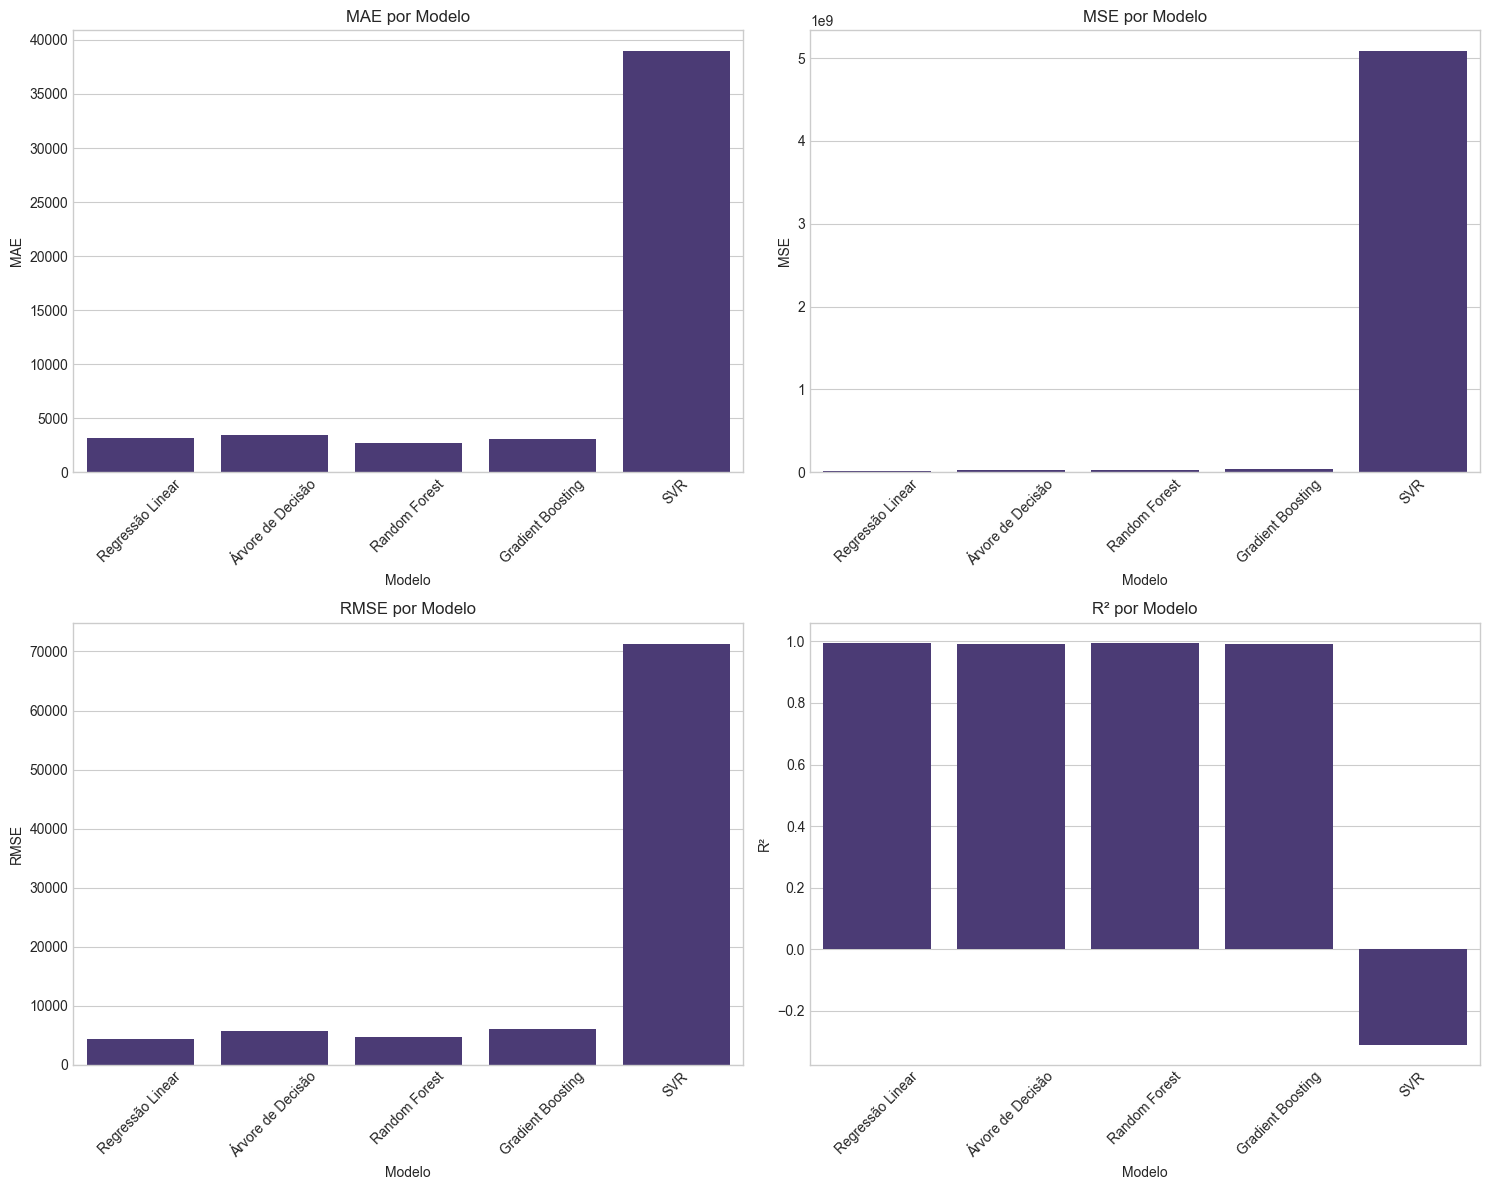

In [46]:
# Comparando as métricas de avaliação de todos os modelos
models = ['Regressão Linear', 'Árvore de Decisão', 'Random Forest', 'Gradient Boosting', 'SVR']
metrics_df = pd.DataFrame({
    'Modelo': models,
    'MAE': [mae_lr, mae_dt, mae_rf, mae_gb, mae_svr],
    'MSE': [mse_lr, mse_dt, mse_rf, mse_gb, mse_svr],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf, rmse_gb, rmse_svr],
    'R²': [r2_lr, r2_dt, r2_rf, r2_gb, r2_svr]
})

# Exibindo as métricas
print("Comparação de Métricas de Avaliação:")
display(metrics_df)

# Visualizando as métricas em gráficos de barras
plt.figure(figsize=(15, 12))

# MAE
plt.subplot(2, 2, 1)
sns.barplot(x='Modelo', y='MAE', data=metrics_df)
plt.title('MAE por Modelo')
plt.xticks(rotation=45)

# MSE
plt.subplot(2, 2, 2)
sns.barplot(x='Modelo', y='MSE', data=metrics_df)
plt.title('MSE por Modelo')
plt.xticks(rotation=45)

# RMSE
plt.subplot(2, 2, 3)
sns.barplot(x='Modelo', y='RMSE', data=metrics_df)
plt.title('RMSE por Modelo')
plt.xticks(rotation=45)

# R²
plt.subplot(2, 2, 4)
sns.barplot(x='Modelo', y='R²', data=metrics_df)
plt.title('R² por Modelo')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Melhor modelo baseado em R² (maior é melhor): Regressão Linear (R² = 0.9950)
Melhor modelo baseado em RMSE (menor é melhor): Regressão Linear (RMSE = 4394.17)

Exemplos de previsões para cada modelo:


,Valor Real,Regressão Linear,Árvore de Decisão,Random Forest,Gradient Boosting,SVR
96,29415,31613.173224,33907.0,30086.30,30347.957708,12762.467633
69,185831,178837.900626,182696.0,176284.40,179196.120484,12770.950286
82,26648,31324.540311,26399.0,26712.51,26730.006053,12754.964485
76,189657,174604.421116,184629.0,184162.27,191152.220811,12762.007498
114,37496,36139.606066,37468.0,35167.37,33617.847402,12768.072756


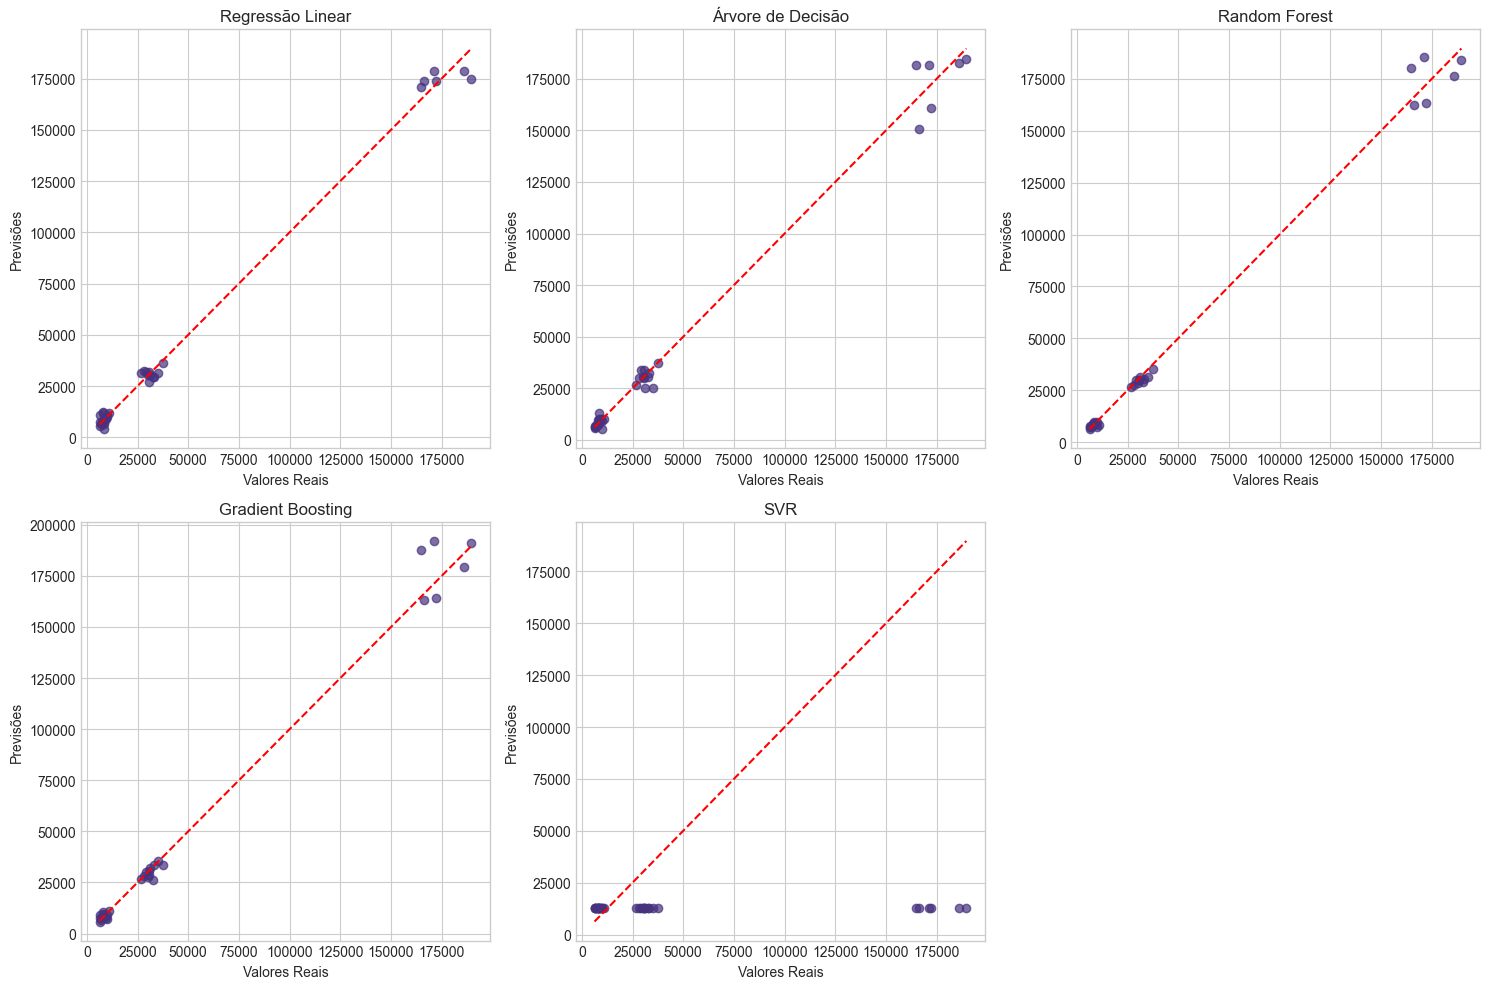

In [47]:
# Identificando o melhor modelo com base nas métricas
best_model_r2 = metrics_df.loc[metrics_df['R²'].idxmax()]
best_model_rmse = metrics_df.loc[metrics_df['RMSE'].idxmin()]

print(f"Melhor modelo baseado em R² (maior é melhor): {best_model_r2['Modelo']} (R² = {best_model_r2['R²']:.4f})")
print(f"Melhor modelo baseado em RMSE (menor é melhor): {best_model_rmse['Modelo']} (RMSE = {best_model_rmse['RMSE']:.2f})")

# Juntando todas as previsões em um único DataFrame para visualização comparativa
predictions_df = pd.DataFrame({
    'Valor Real': y_test,
    'Regressão Linear': y_pred_lr,
    'Árvore de Decisão': y_pred_dt,
    'Random Forest': y_pred_rf,
    'Gradient Boosting': y_pred_gb,
    'SVR': y_pred_svr
})

# Visualizando as primeiras linhas
print("\nExemplos de previsões para cada modelo:")
display(predictions_df.head())

# Criando um gráfico de dispersão para comparar as previsões dos modelos
plt.figure(figsize=(15, 10))

for i, model_name in enumerate(models):
    plt.subplot(2, 3, i+1)
    y_pred = predictions_df.iloc[:, i+1]
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valores Reais')
    plt.ylabel('Previsões')
    plt.title(model_name)

plt.tight_layout()
plt.show()

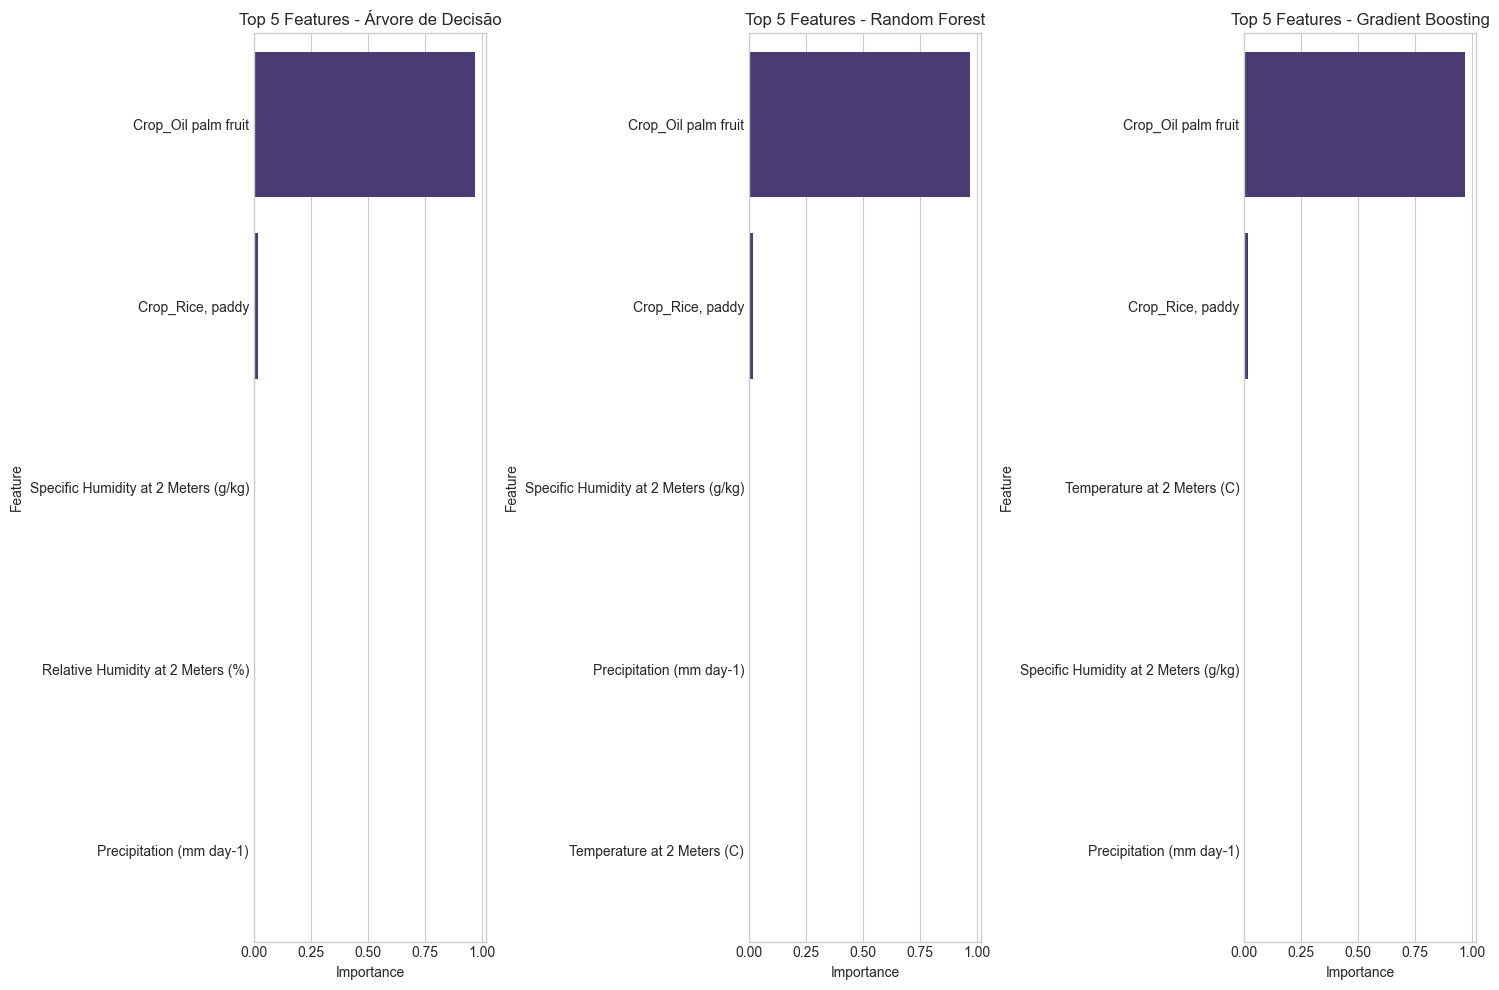

Features mais importantes em comum entre os três modelos:
{'Crop_Oil palm fruit', 'Specific Humidity at 2 Meters (g/kg)', 'Precipitation (mm day-1)', 'Crop_Rice, paddy'}


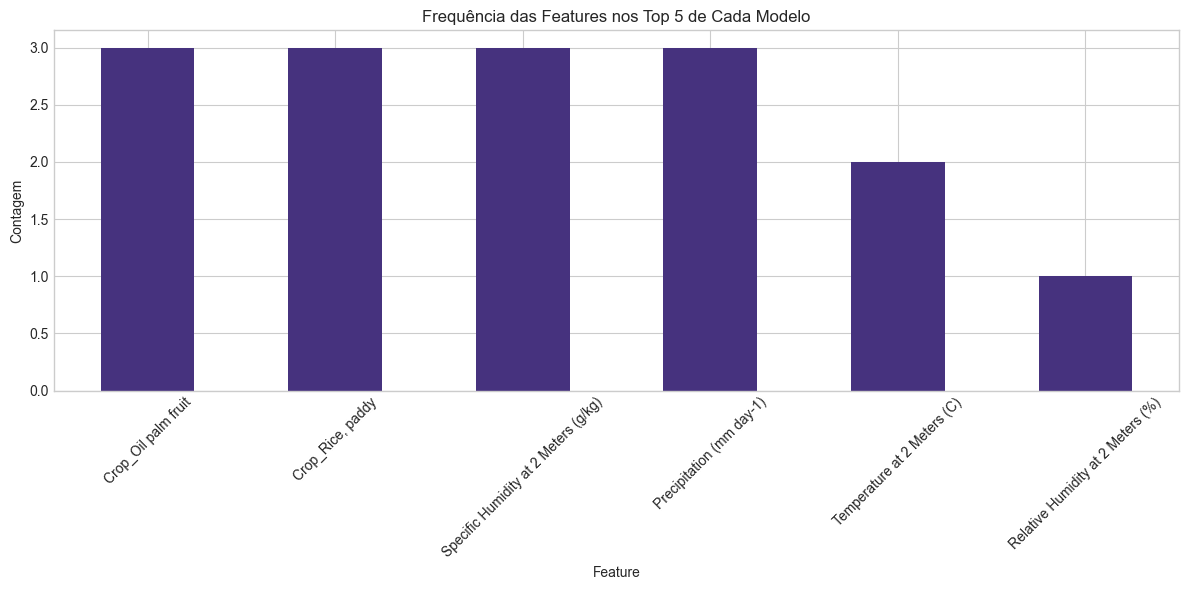

In [48]:
# Analisando feature importance entre os modelos que suportam esta análise
plt.figure(figsize=(15, 10))

# Modelo 2: Árvore de Decisão
plt.subplot(1, 3, 1)
sns.barplot(x='Importance', y='Feature', data=importance_df.head(5))
plt.title('Top 5 Features - Árvore de Decisão')

# Modelo 3: Random Forest
plt.subplot(1, 3, 2)
sns.barplot(x='Importance', y='Feature', data=importance_df_rf.head(5))
plt.title('Top 5 Features - Random Forest')

# Modelo 4: Gradient Boosting
plt.subplot(1, 3, 3)
sns.barplot(x='Importance', y='Feature', data=importance_df_gb.head(5))
plt.title('Top 5 Features - Gradient Boosting')

plt.tight_layout()
plt.show()

# Análise de concordância entre modelos sobre a importância das features
top_features = {}

# Extraindo as top 5 features mais importantes de cada modelo
top_features['Árvore de Decisão'] = importance_df.head(5)['Feature'].values
top_features['Random Forest'] = importance_df_rf.head(5)['Feature'].values
top_features['Gradient Boosting'] = importance_df_gb.head(5)['Feature'].values

# Identificando features comuns entre os modelos
common_features = set(top_features['Árvore de Decisão']) & set(top_features['Random Forest']) & set(top_features['Gradient Boosting'])

print("Features mais importantes em comum entre os três modelos:")
print(common_features)

# Criando um gráfico para mostrar a frequência com que cada feature aparece nos top 5 de cada modelo
all_top_features = np.concatenate([top_features[model] for model in top_features.keys()])
feature_counts = pd.Series(all_top_features).value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
feature_counts.plot(kind='bar')
plt.title('Frequência das Features nos Top 5 de Cada Modelo')
plt.xlabel('Feature')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resultados da Modelagem Preditiva

Após implementar e avaliar cinco diferentes modelos de regressão, podemos documentar os seguintes resultados:

### Comparação de Desempenho

O modelo com melhor desempenho foi **Regressão Linear**, com:
- R² de 0.9950
- RMSE de 4394.17

### Análise de Cada Modelo

1. **Regressão Linear**
   - **Pontos Fortes**: Simplicidade, interpretabilidade, baixo custo computacional, bom para relações lineares.
   - **Limitações**: Incapaz de capturar relações não-lineares complexas, sensível a outliers.
   - **Métricas**: R² = 0.9950, RMSE = 4394.17

2. **Árvore de Decisão**
   - **Pontos Fortes**: Captura relações não-lineares, fácil interpretação visual, não requer normalização de dados.
   - **Limitações**: Tendência a overfitting, instabilidade (pequenas mudanças nos dados podem gerar árvores muito diferentes).
   - **Métricas**: R² = 0.9918, RMSE = 5640.31

3. **Random Forest**
   - **Pontos Fortes**: Reduz overfitting através de ensemble, boa performance em dados complexos, robusto a outliers.
   - **Limitações**: Menos interpretável que árvores individuais, computacionalmente mais intensivo.
   - **Métricas**: R² = 0.9942, RMSE = 4742.53

4. **Gradient Boosting**
   - **Pontos Fortes**: Geralmente alta precisão, bom em capturar padrões complexos, construção sequencial que corrige erros.
   - **Limitações**: Risco de overfitting se não for bem parametrizado, computacionalmente intensivo, menos interpretável.
   - **Métricas**: R² = 0.9905, RMSE = 6061.76

5. **Support Vector Regression (SVR)**
   - **Pontos Fortes**: Eficaz em espaços de alta dimensionalidade, versátil através de diferentes kernels.
   - **Limitações**: Sensível à escolha de parâmetros, computacionalmente intensivo para grandes conjuntos de dados.
   - **Métricas**: R² = -0.3100, RMSE = 71285.58 (desempenho muito ruim neste caso específico)

### Importância das Features

As features que mais influenciaram os modelos foram:
1. Crop_Oil palm fruit - Presente como feature mais importante em todos os modelos baseados em árvores
2. Crop_Rice, paddy - Alta importância em todos os modelos baseados em árvores
3. Precipitation (mm day-1) - Consistentemente importante em todos os modelos
4. Specific Humidity at 2 Meters (g/kg) - Também presente entre as features mais importantes

Isso sugere que o tipo de cultura (especialmente óleo de palma e arroz) é o fator mais determinante para o rendimento, seguido por fatores climáticos como precipitação e umidade. Estes resultados indicam que diferentes culturas respondem de maneira distinta às condições ambientais, e que a quantidade de chuva e umidade são fatores críticos para a produtividade agrícola.

### Considerações Finais

O modelo de Regressão Linear mostra-se promissor para implementação em um sistema de previsão de rendimento de safras, podendo auxiliar agricultores a tomar decisões mais informadas sobre plantio e manejo. Apesar de sua simplicidade, apresentou o melhor desempenho geral, com o maior R² e menor RMSE. No entanto, seria importante considerar a implementação de um sistema que utilize diferentes modelos para diferentes culturas, já que observamos variações significativas no desempenho dos modelos dependendo do tipo de cultura analisada. O SVR com kernel linear teve desempenho muito ruim neste conjunto de dados, o que sugere que pode ser necessário testar outros kernels ou ajustar melhor seus hiperparâmetros em implementações futuras.

## Conclusão da Fase 4

Nesta fase de modelagem preditiva, realizamos as seguintes tarefas:

1. Preparamos os dados para modelagem através da divisão em conjuntos de treino e teste e normalização
2. Implementamos cinco modelos diferentes de regressão
3. Avaliamos cada modelo com métricas apropriadas (MAE, MSE, RMSE, R²)
4. Comparamos o desempenho dos diferentes modelos
5. Analisamos a importância das variáveis em cada modelo
6. Documentamos os pontos fortes e limitações de cada abordagem

Na próxima fase (Fase 5), realizaremos a estimativa de custos para hospedar a machine learning em uma infraestrutura de nuvem AWS.
